In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 8})

# I. LOAD DATA

In [2]:
train0 = pd.read_csv('./Data/train.csv') 

In [3]:
train0.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train0.shape[0]

1460

In [5]:
train0.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [6]:
#list(train0)

## Create some new variables

In [7]:
# Create New Numerical Variables
train0['AgeWhenSold'] = train0['YrSold'] - train0['YearBuilt']
train0['YrsSinceRemodel'] = train0['YrSold'] - train0['YearRemodAdd'] 

In [8]:
# Ensure these variabes are categorical
train0['MSSubClass'] = train0['MSSubClass'].astype(str)
train0['OverallQual'] = train0['OverallQual'].astype(str)
train0['OverallCond'] = train0['OverallCond'].astype(str)

train0['MoSold'] = train0['MoSold'].astype(str)
train0['YrSold'] = train0['YrSold'].astype(str)
train0['YearBuilt'] = train0['YearBuilt'].astype(str)
      
train0['YearRemodAdd'] = train0['YearRemodAdd'].astype(str)
train0['GarageYrBlt'] = train0['GarageYrBlt'].astype(str)

In [9]:
# Replacing this string np.nan (will look at missing values later)
train0.loc[(train0['GarageYrBlt']=='nan'),'GarageYrBlt']= np.nan

# II. EXPLORATORY DATA ANALYSIS & VISUALIZATIONS

### Look at the Output/Dependent Variable (Y) - SalePrice 🎯

In [10]:
# Which indices have z-scores >  4
zvals = stats.zscore(train0['SalePrice'])
indx = np.where(abs(zvals) > 4.0)
print(indx)
print('the z-scores: ', zvals[indx])
print('# of indices:',len(indx[0]))

(array([ 178,  440,  691,  769,  803,  898, 1046, 1169, 1182]),)
the z-scores:  [4.04098249 4.71041276 7.22881942 4.49634819 5.06214602 5.42383959
 4.73032076 5.59185509 7.10289909]
# of indices: 9


25th percentile: 129975.0
50th percentile: 163000.0
75th percentile: 214000.0
# of Missing Rows:  0  out of  1460


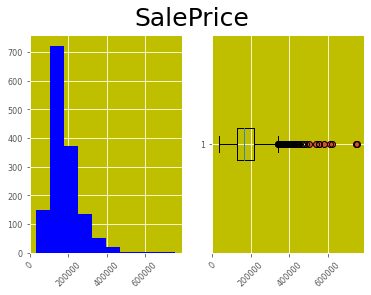

In [11]:
# The Distribution of the OUTPUT/DEPENDENT variable

fig, axs = plt.subplots(1,2)
fig.suptitle('SalePrice',fontsize=25)
axs[1].boxplot(train0['SalePrice'],vert=False)
axs[1].tick_params(axis='x', rotation = 45)
axs[1].set_facecolor('y')

axs[1].scatter(train0.loc[indx,'SalePrice'], 
              [np.ones(len(indx[0]))]) # large z-scores 

axs[0].hist(train0['SalePrice'],color='b')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_facecolor('y')

print('25th percentile:',train0['SalePrice'].quantile(.25))
print('50th percentile:',train0['SalePrice'].median())
print('75th percentile:',train0['SalePrice'].quantile(.75))
print('# of Missing Rows: ', train0['SalePrice'].isna().sum(), 
    ' out of ',len(train0['SalePrice']))

#### REMOVE these indices that have z-scores > 4

In [14]:
train0 = train0.drop(labels=list(indx[0]), axis=0).reset_index()

In [15]:
train0.shape[0]

1451

## A. The Numeric Variables

In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train0.select_dtypes(include=numerics)
numlist = list(num_train)
print(len(numlist),' numeric variables')
print(numlist)

33  numeric variables
['index', 'Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeWhenSold', 'YrsSinceRemodel']


In [17]:
# num_train.describe()

### The Independent Variable (Xs) 

In [18]:
# correlation threshold, used to highlight particular figures moving forward
corr_thrshld = 0.4

<ipython-input-21-f7216159ef37>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,2)


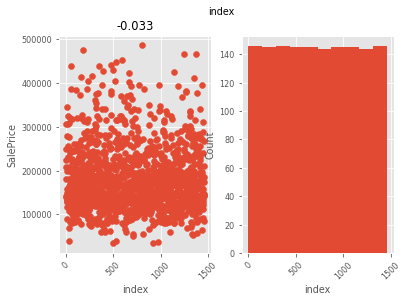

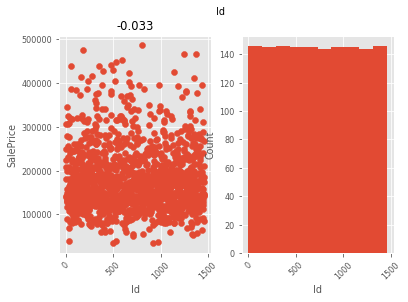

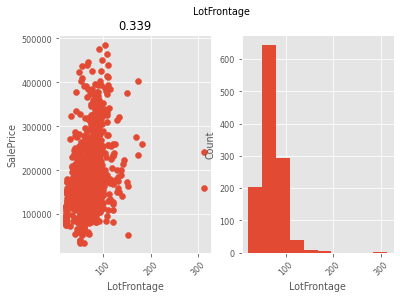

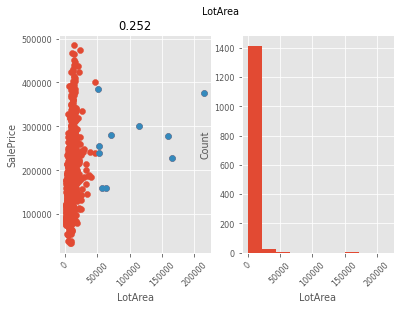

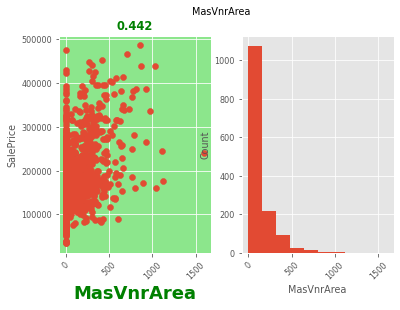

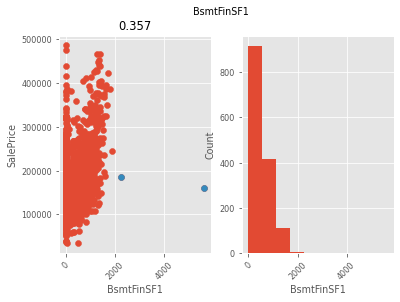

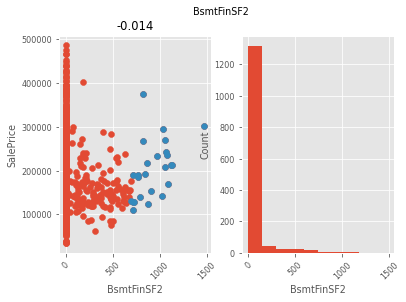

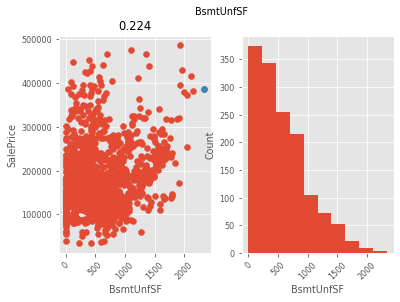

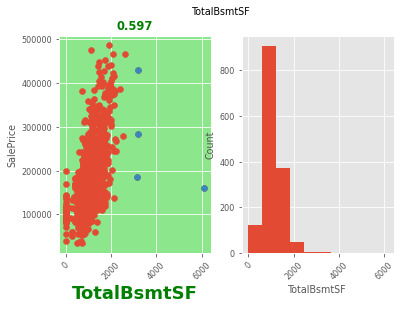

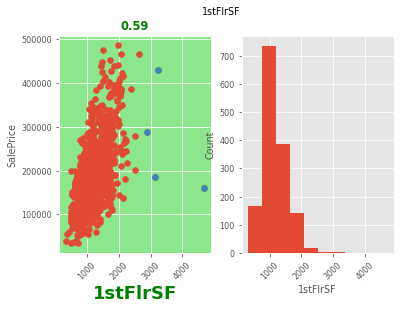

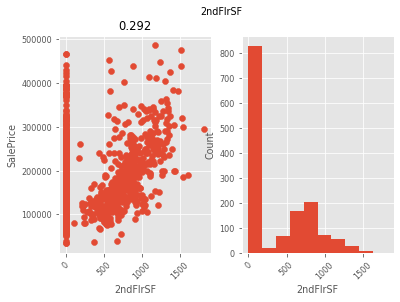

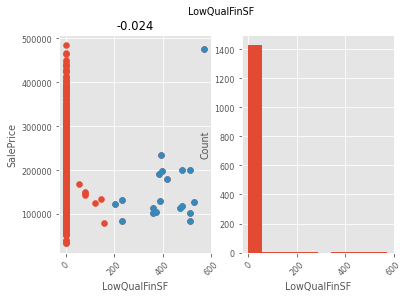

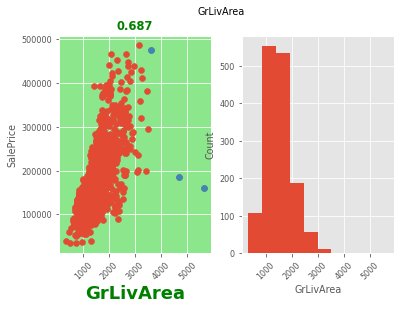

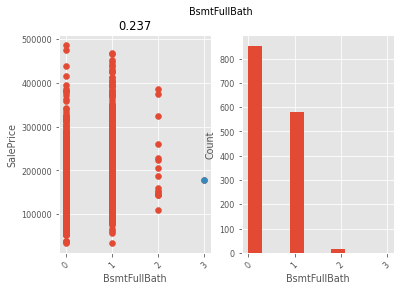

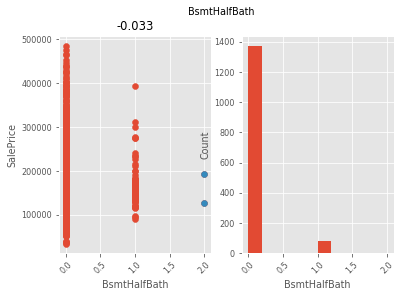

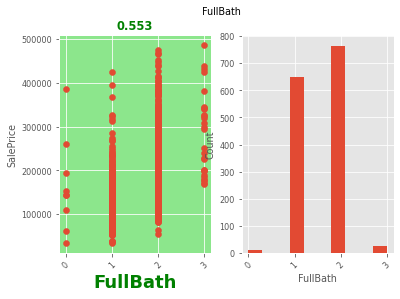

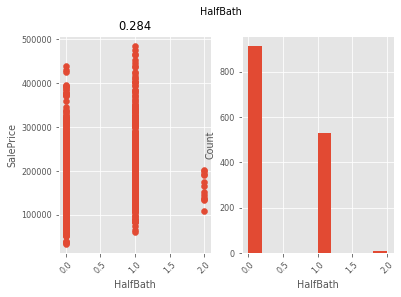

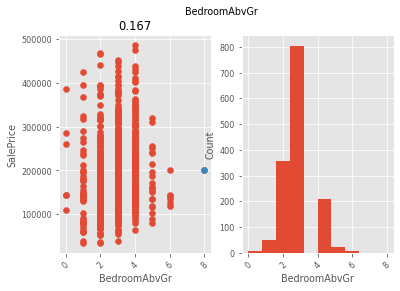

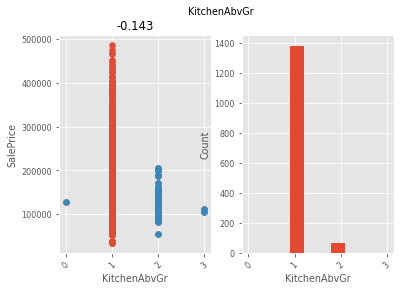

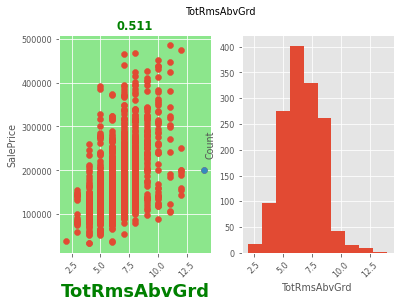

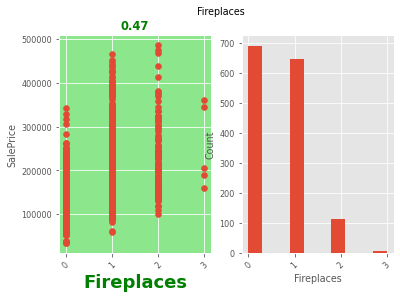

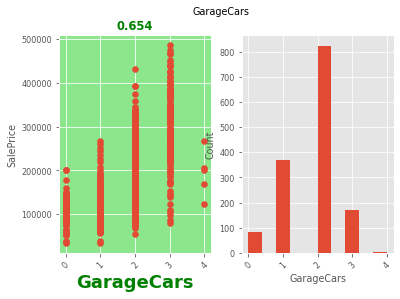

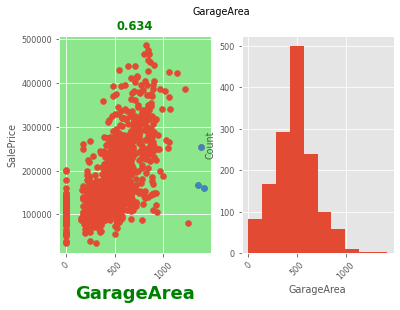

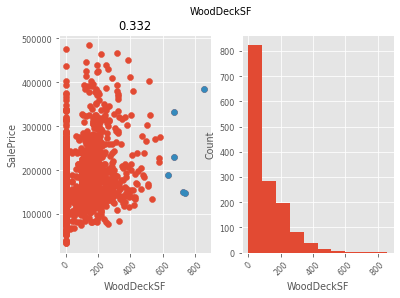

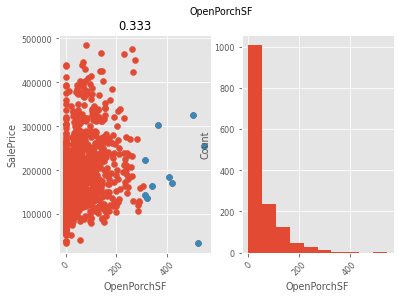

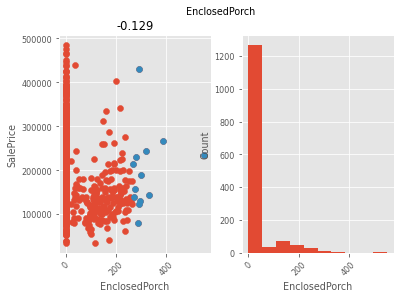

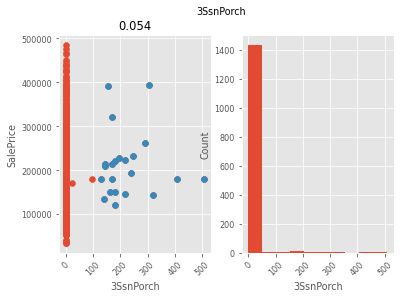

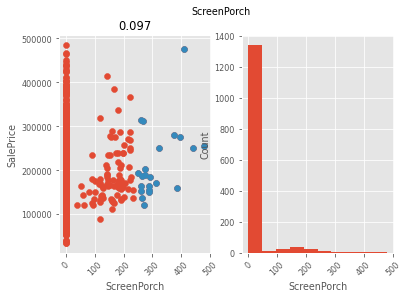

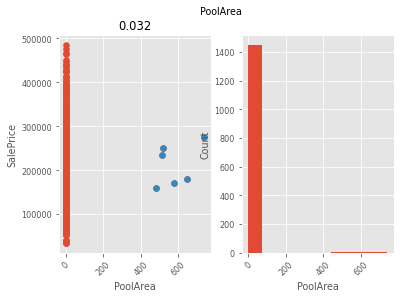

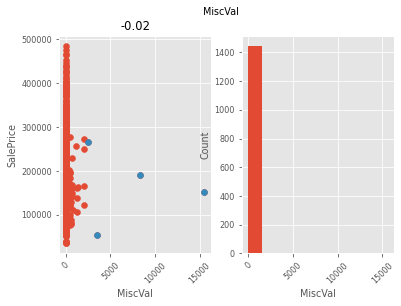

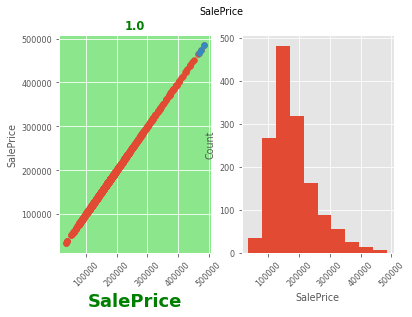

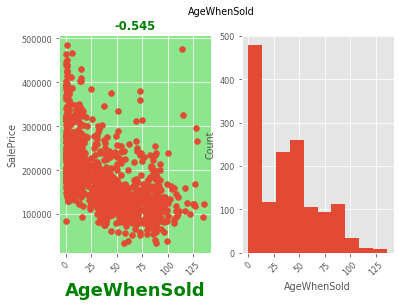

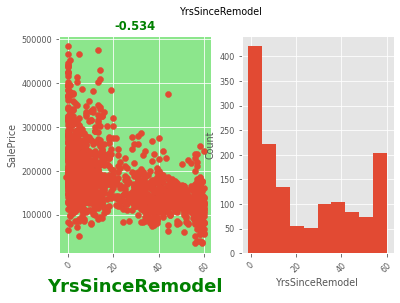

In [21]:
import numpy.ma as ma # need this to allow corrcoef to handle the nan rows

for nvar in numlist:
    fig, axs = plt.subplots(1,2)
    fig.suptitle(nvar)
    
    # Histogram
    axs[1].hist(train0[nvar])
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel(nvar)
    
    # Which indices have z-scores > 4
    zvals = stats.zscore(train0[nvar])
    indx = np.where(abs(zvals) > 4)

    # Scatter
    axs[0].scatter(train0[nvar],train0['SalePrice'])
    axs[0].scatter(train0.loc[indx,nvar],
                   train0.loc[indx,'SalePrice']) # z-scores > 4
    
    r = ma.corrcoef(ma.masked_invalid(train0[nvar]), 
                ma.masked_invalid(train0['SalePrice']))
    
    if np.abs(r[0,1]) >= corr_thrshld:
        axs[0].set_title(round(r[0,1],3), fontweight = 'bold',color='g')
        axs[0].set_facecolor('#8ce68c')
        axs[0].set_xlabel(nvar, fontsize = 18, fontweight = 'bold',color='g')
        
    elif np.abs(r[0,1]) < corr_thrshld:
        axs[0].set_title(round(r[0,1],3))
        axs[0].set_xlabel(nvar)
    
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylabel('SalePrice')

In [22]:
# Correlations between Output variable and other numerical variables
correlations = num_train.corr()
# print(correlations['SalePrice'])
ycorr = correlations['SalePrice']
ycorr[np.abs(ycorr)>corr_thrshld]

MasVnrArea         0.442144
TotalBsmtSF        0.596771
1stFlrSF           0.589676
GrLivArea          0.686872
FullBath           0.553014
TotRmsAbvGrd       0.510964
Fireplaces         0.469693
GarageCars         0.654418
GarageArea         0.633607
SalePrice          1.000000
AgeWhenSold       -0.544596
YrsSinceRemodel   -0.534103
Name: SalePrice, dtype: float64

In [23]:
# manually created this, figure out how to do it automatically above
hcorr_list = ['AgeWhenSold','YrsSinceRemodel',
              'MasVnrArea','TotalBsmtSF', 
             '1stFlrSF','GrLivArea','FullBath',
             'TotRmsAbvGrd','Fireplaces',
             'GarageCars','GarageArea']

## B. The Categorical Variables

In [24]:
cattypes = ['O']
cat_train = train0.select_dtypes(include=cattypes)
catlist = list(cat_train)
print(len(catlist),' categorical variables')
catlist

51  categorical variables


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

<ipython-input-25-94faae269ca3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,8))


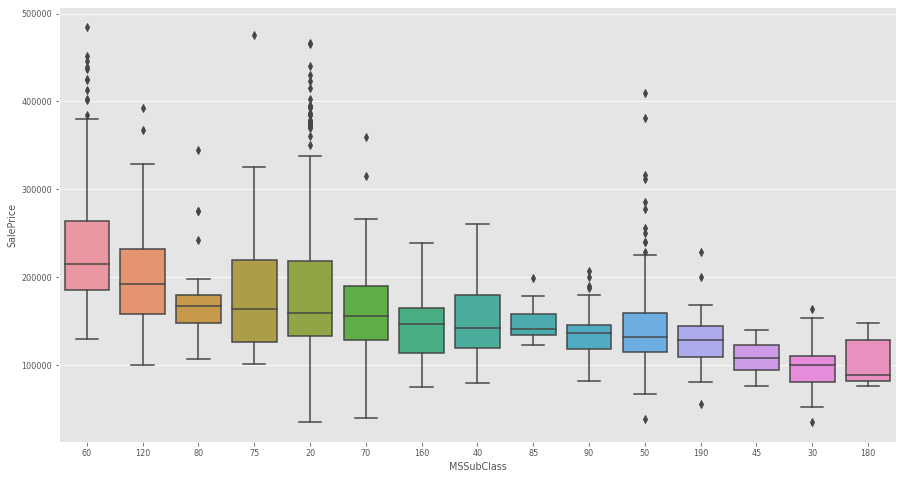

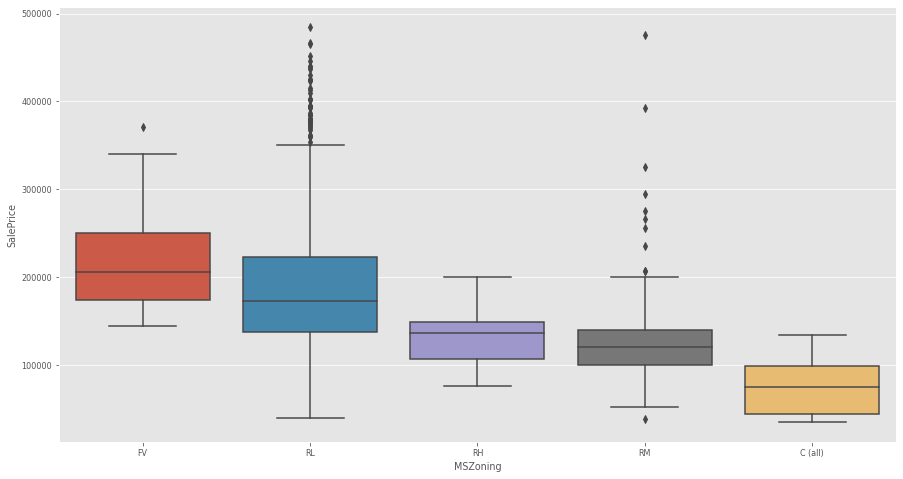

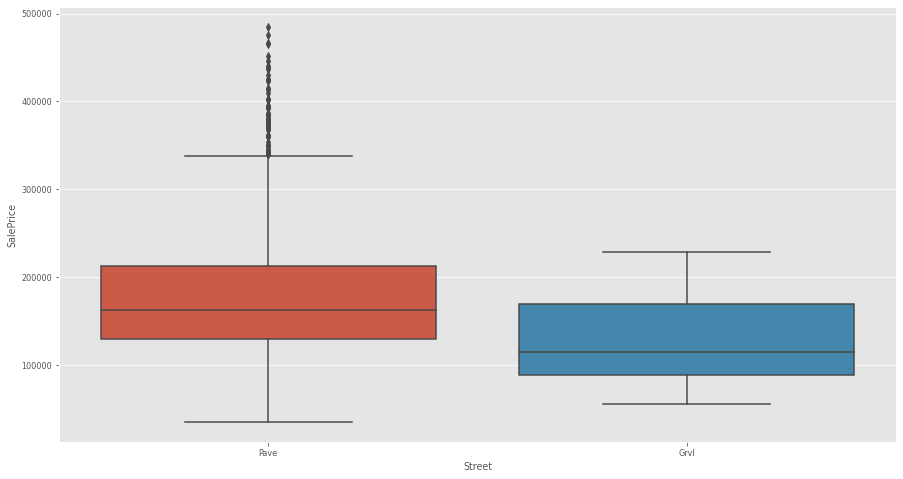

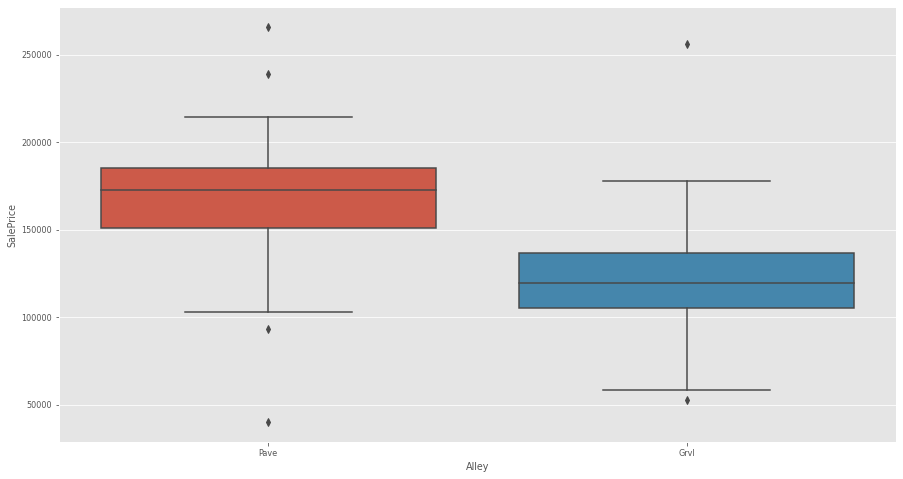

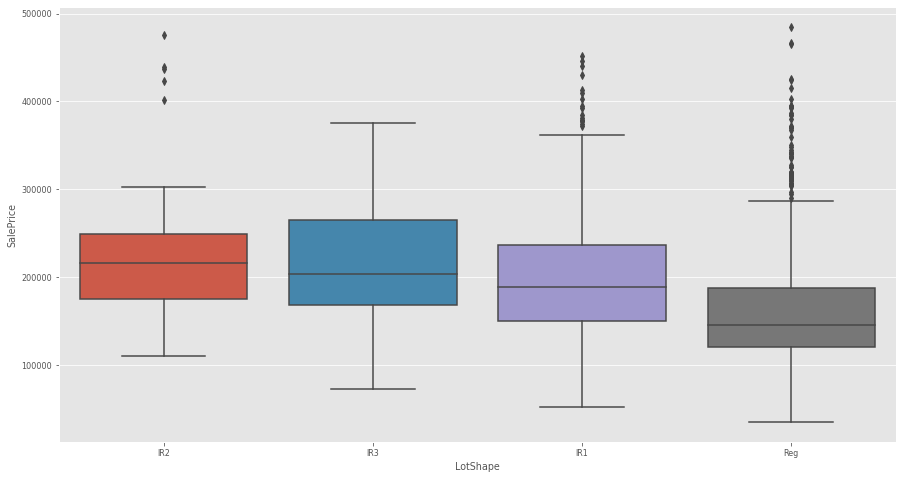

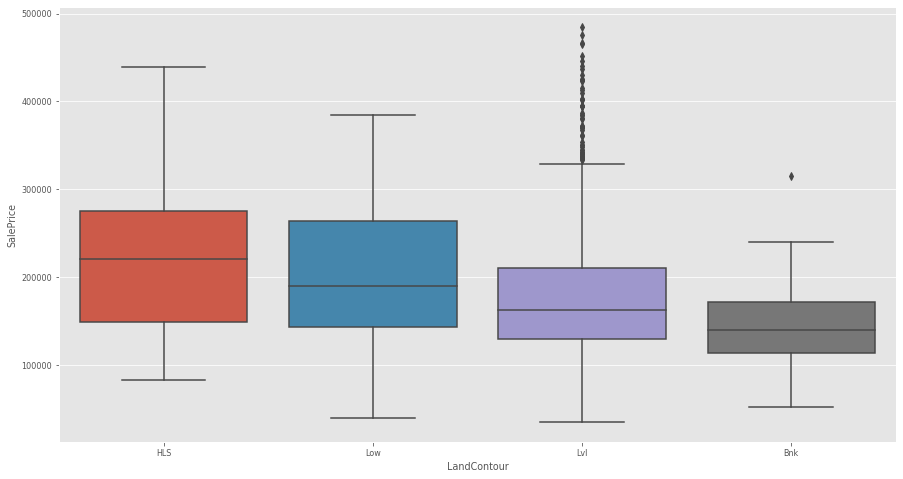

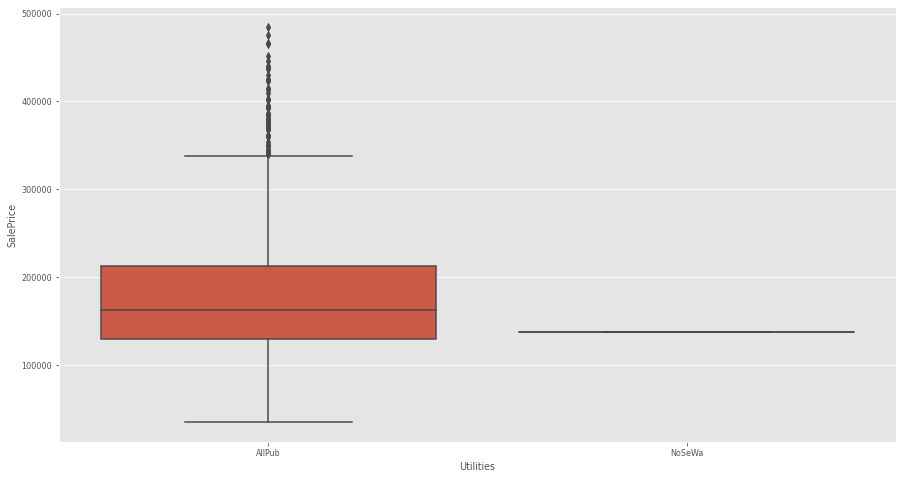

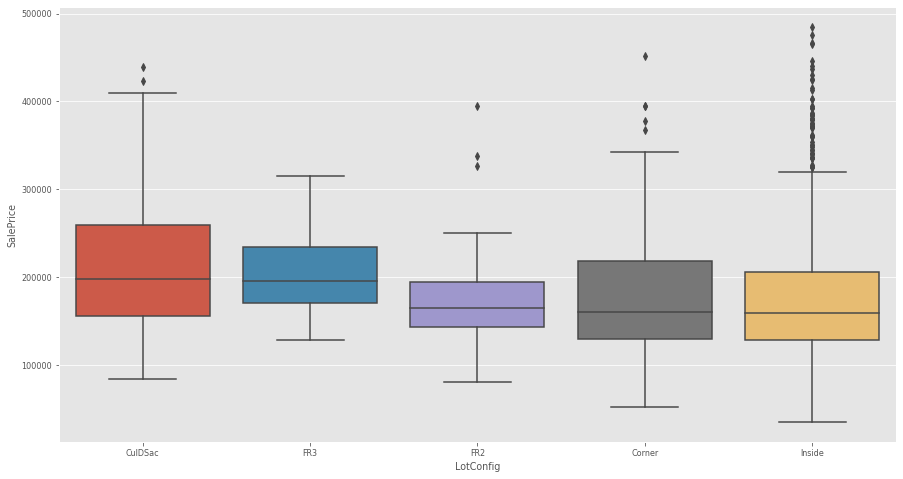

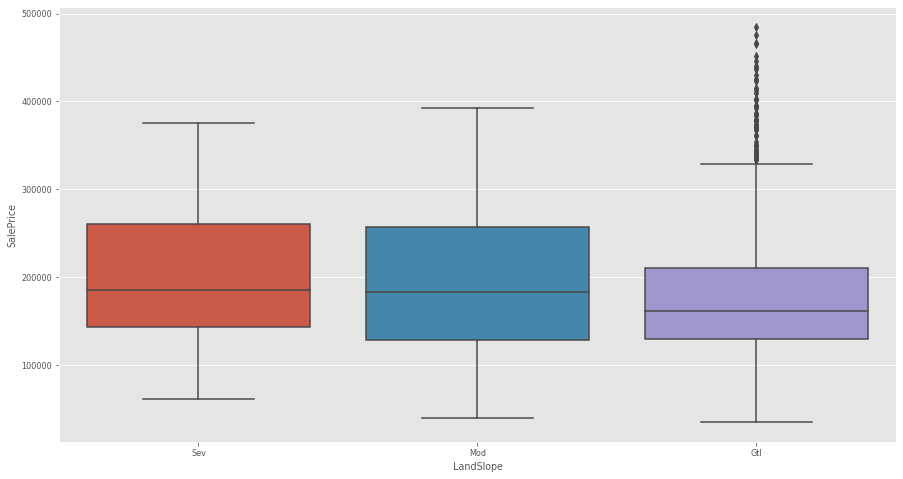

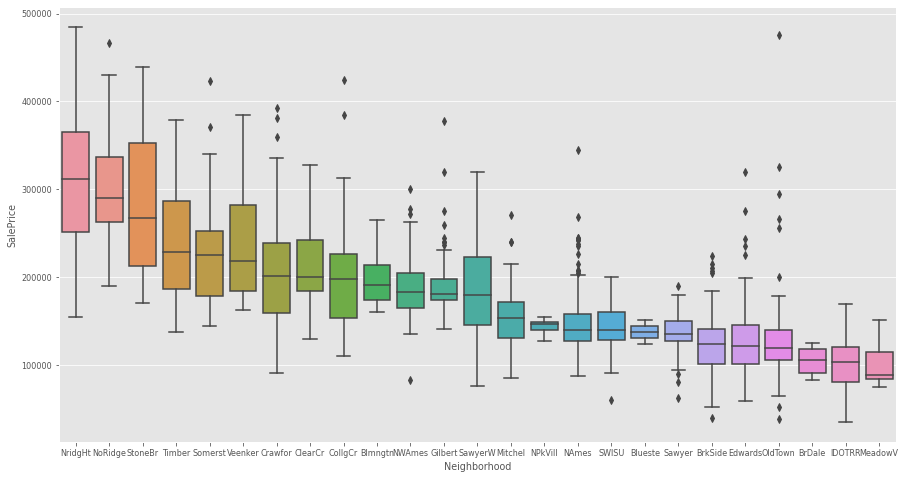

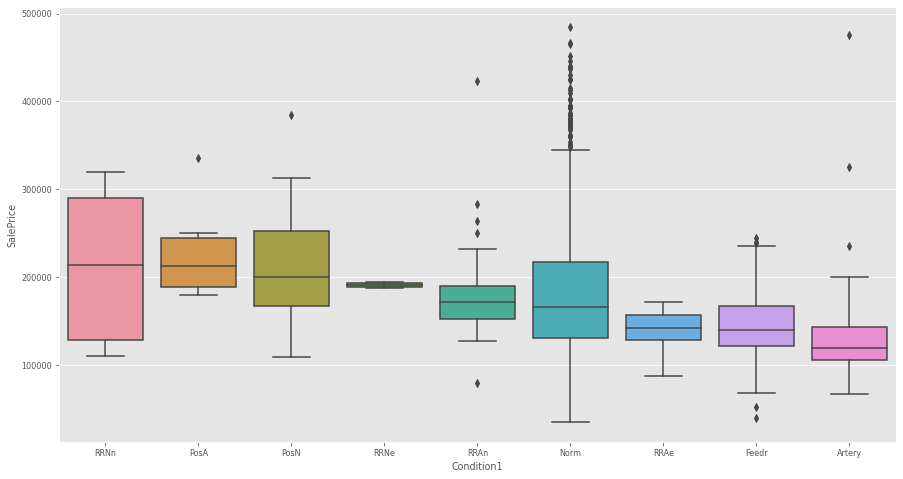

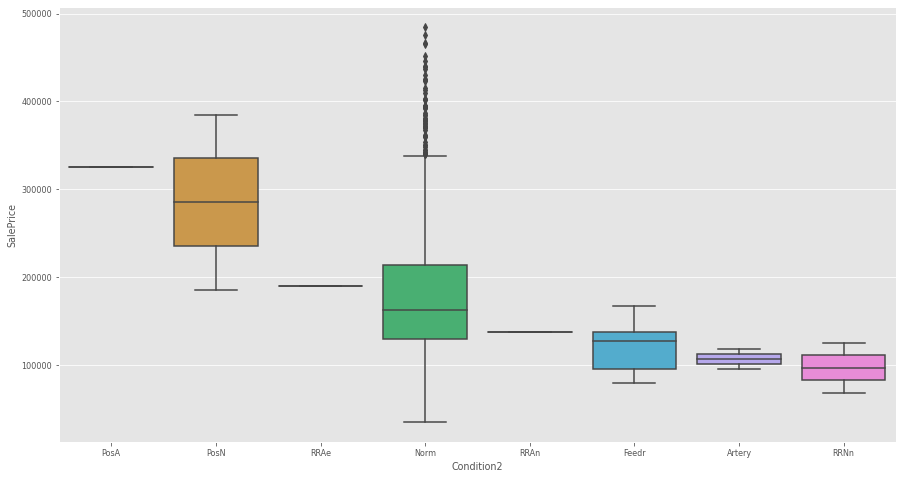

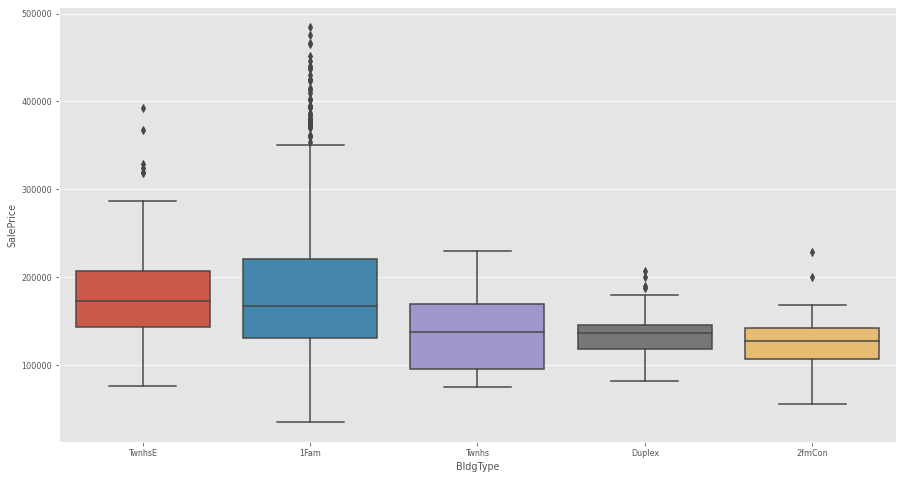

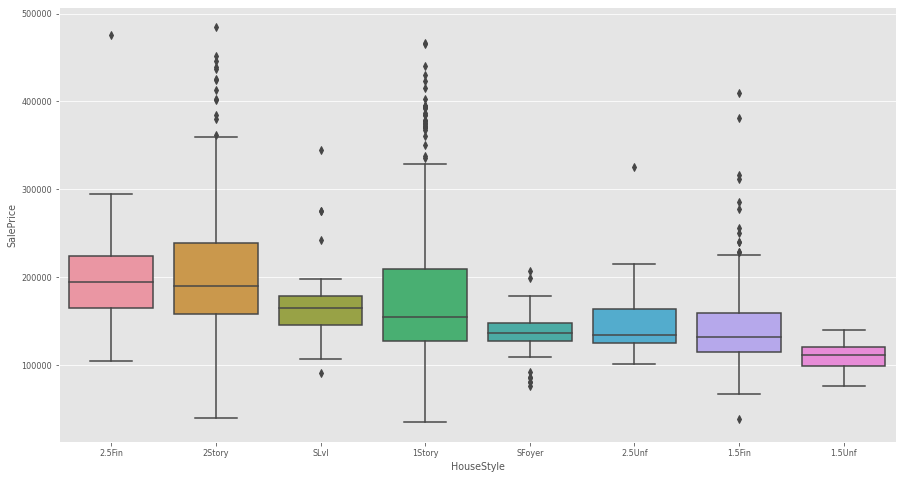

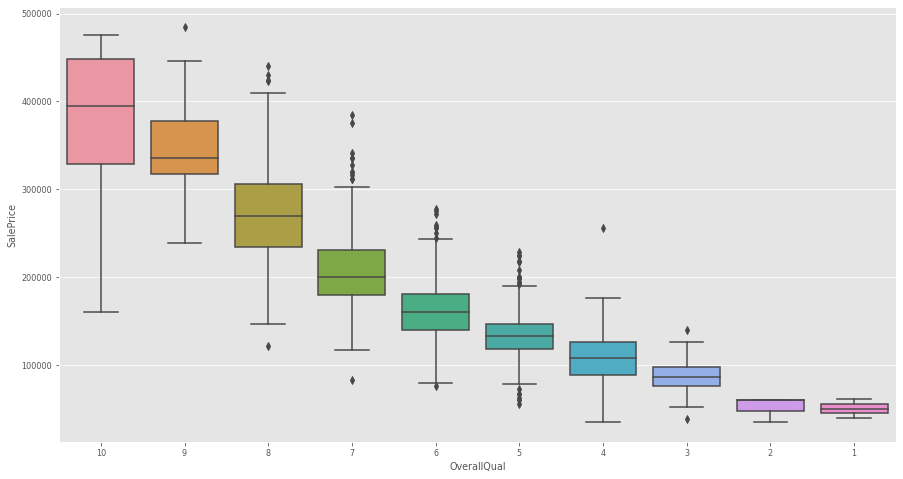

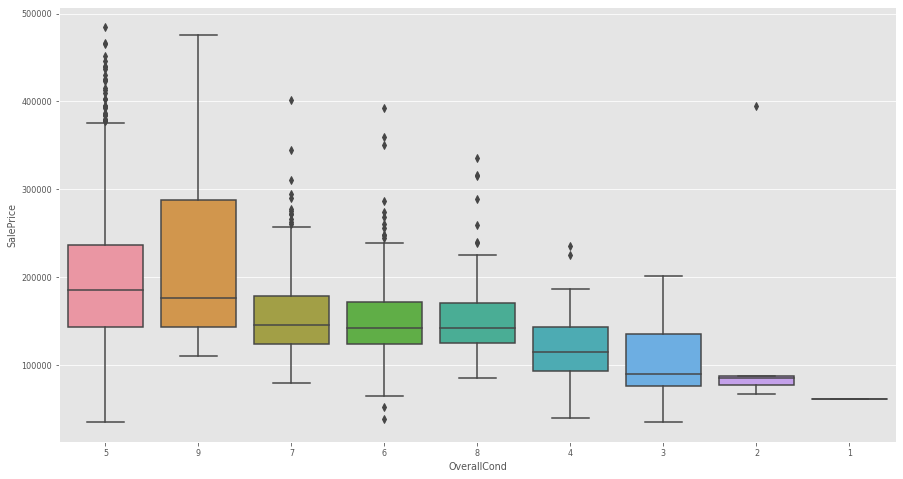

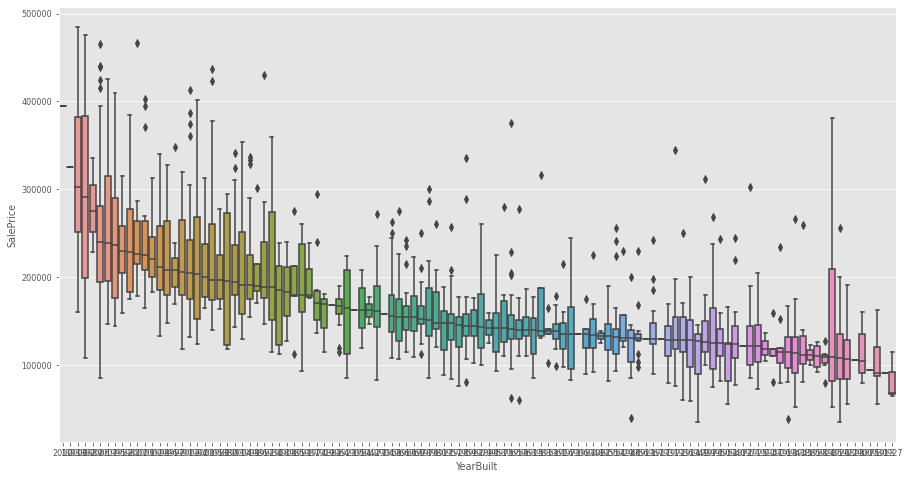

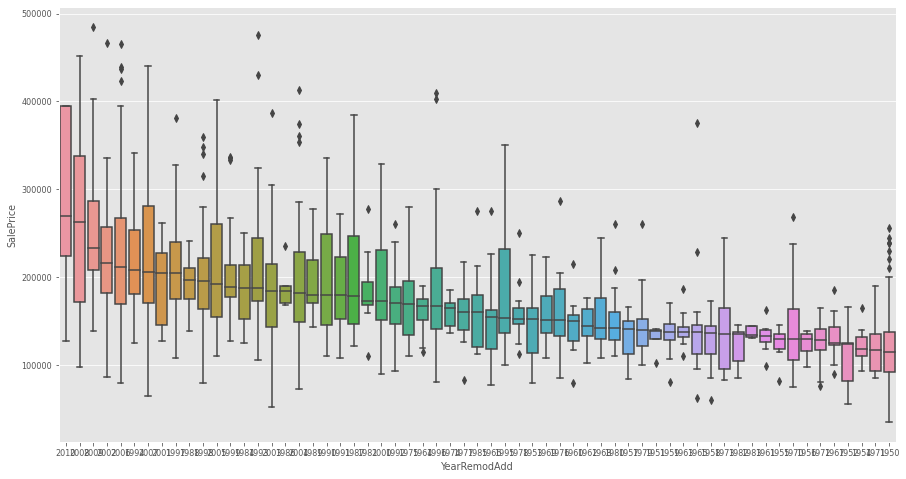

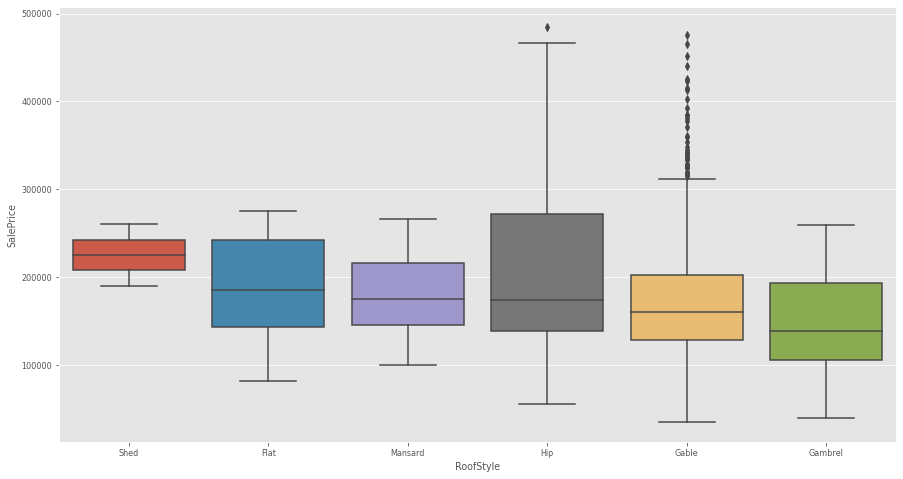

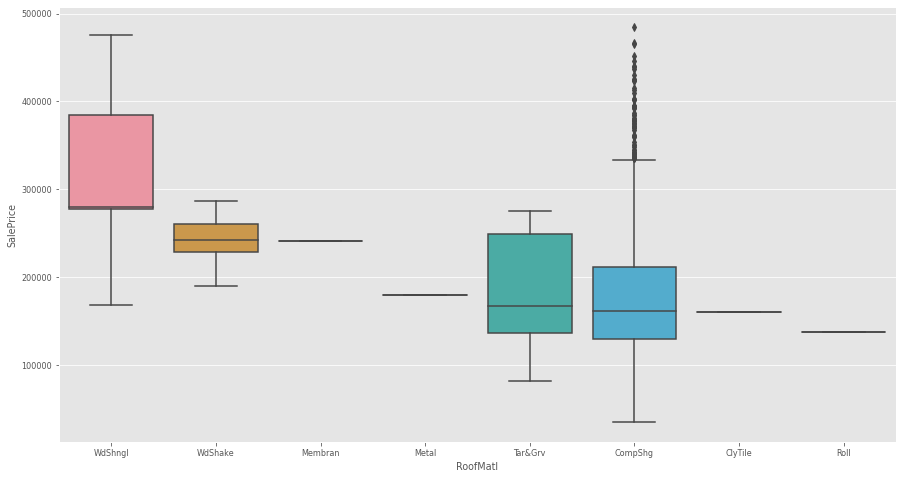

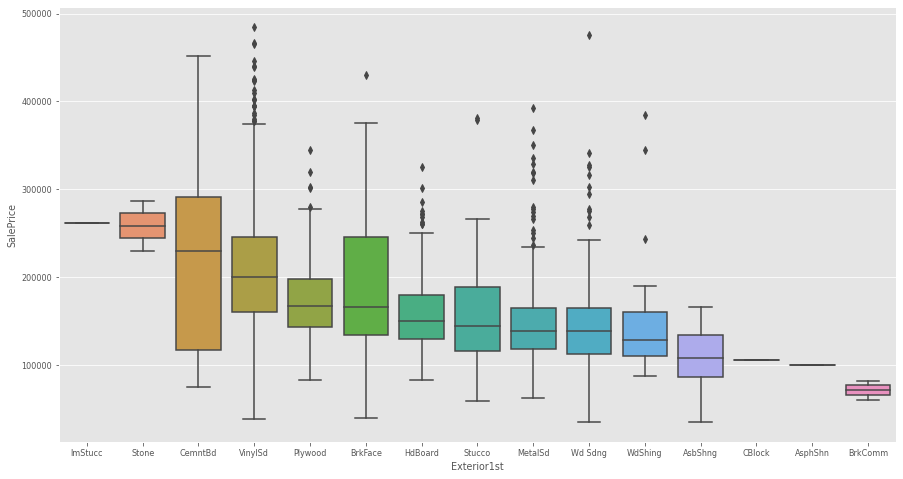

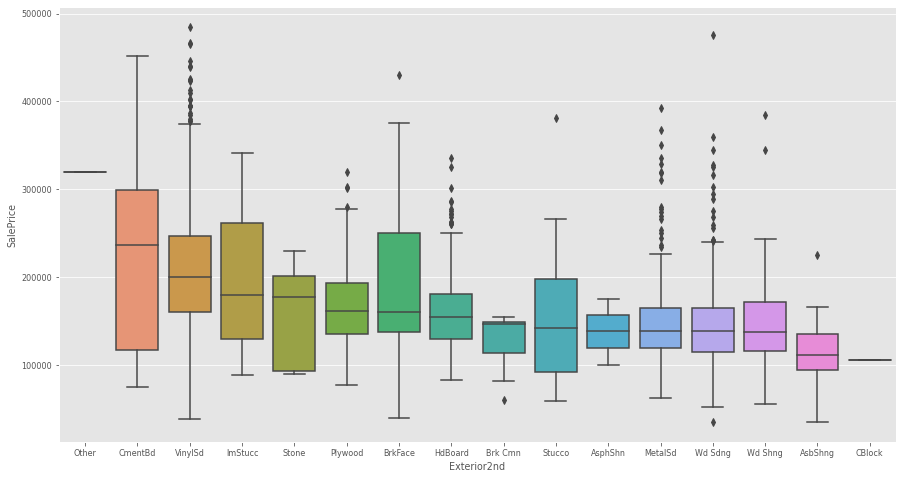

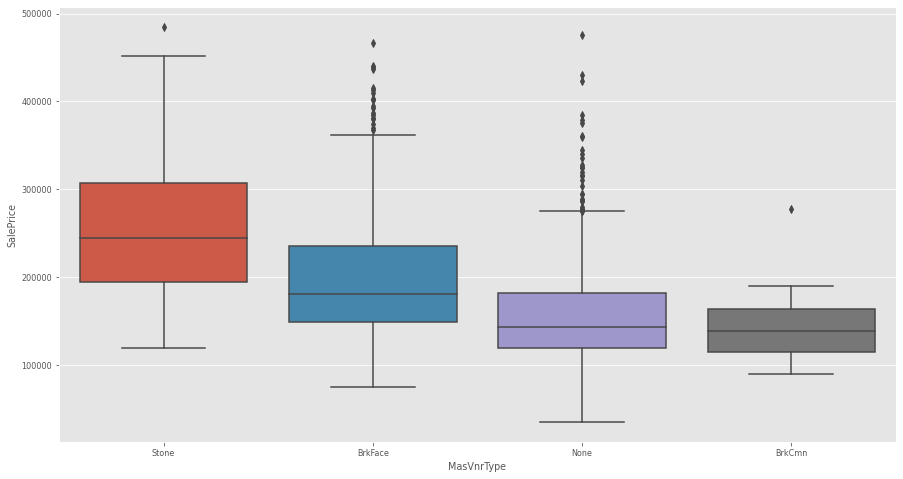

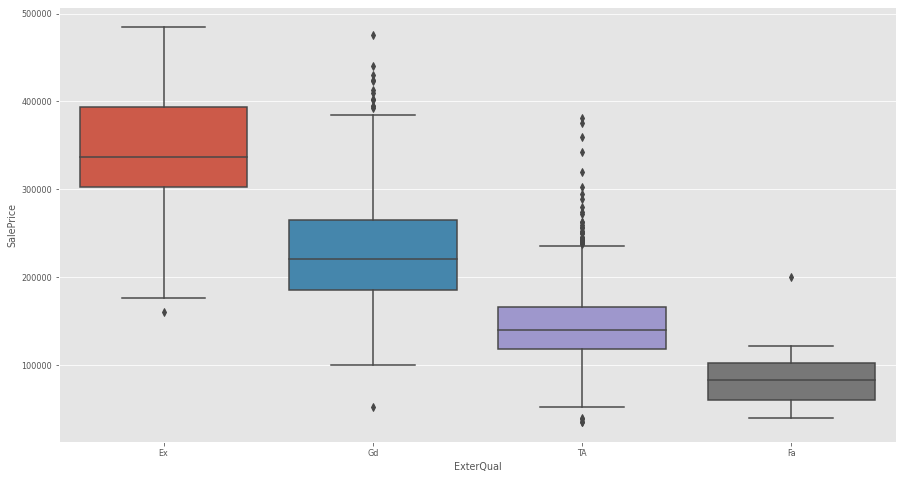

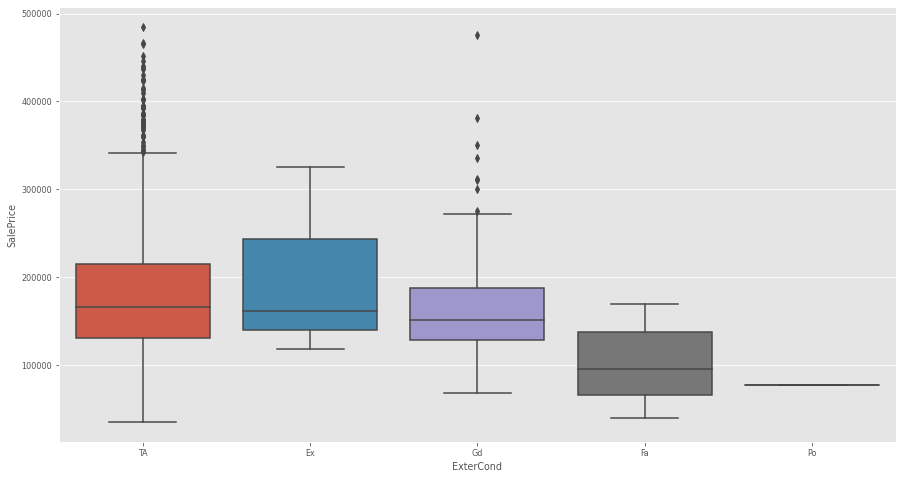

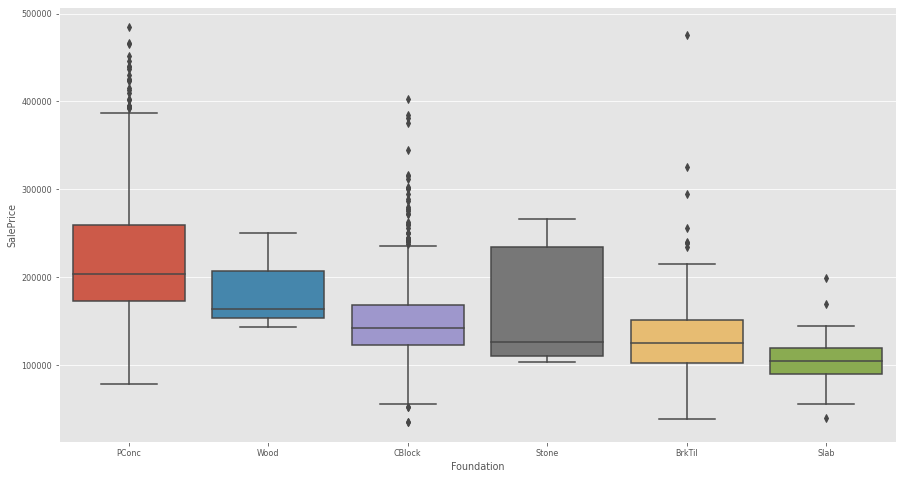

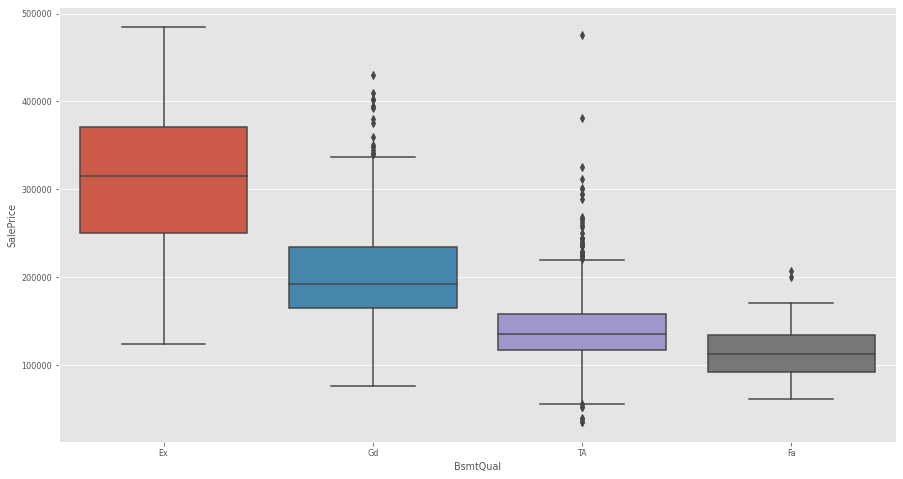

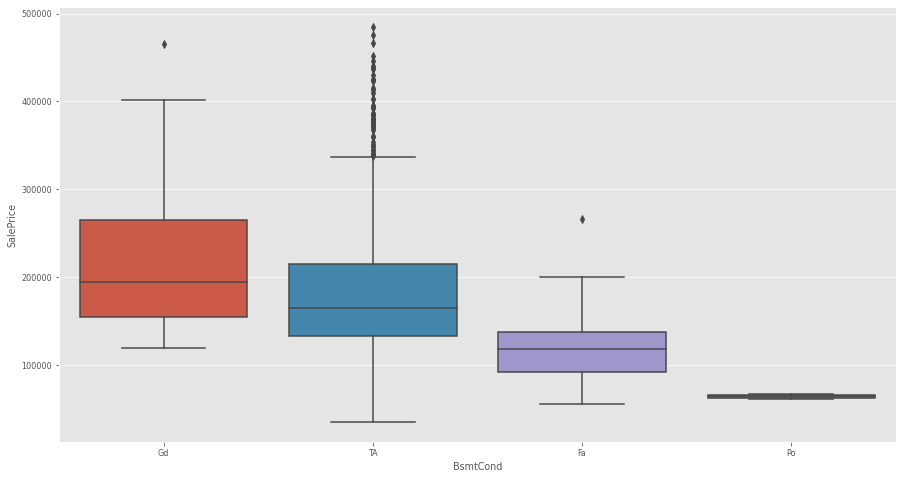

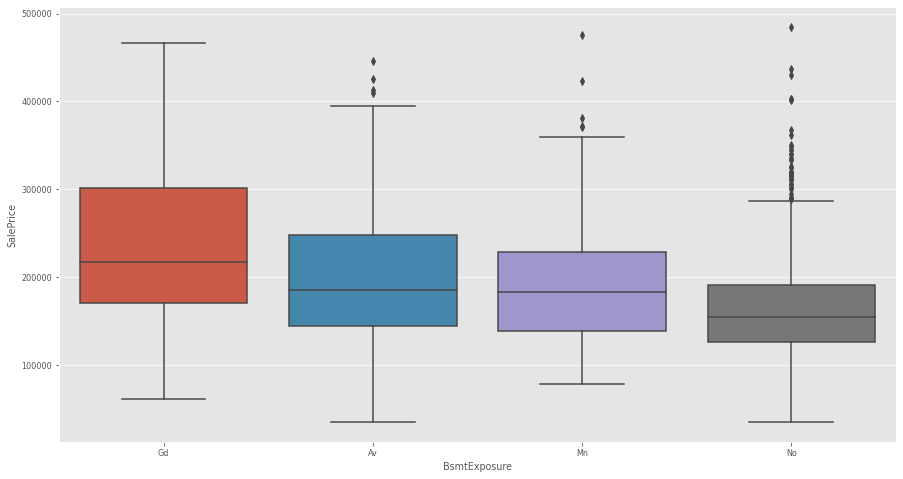

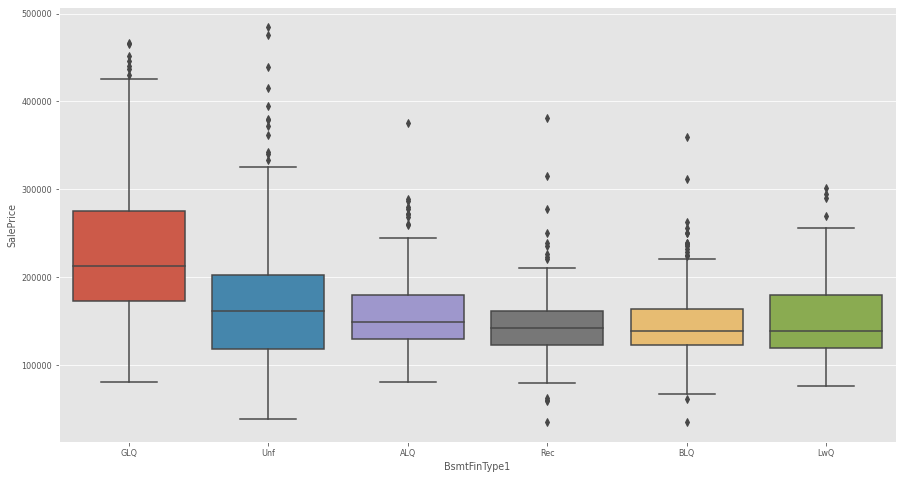

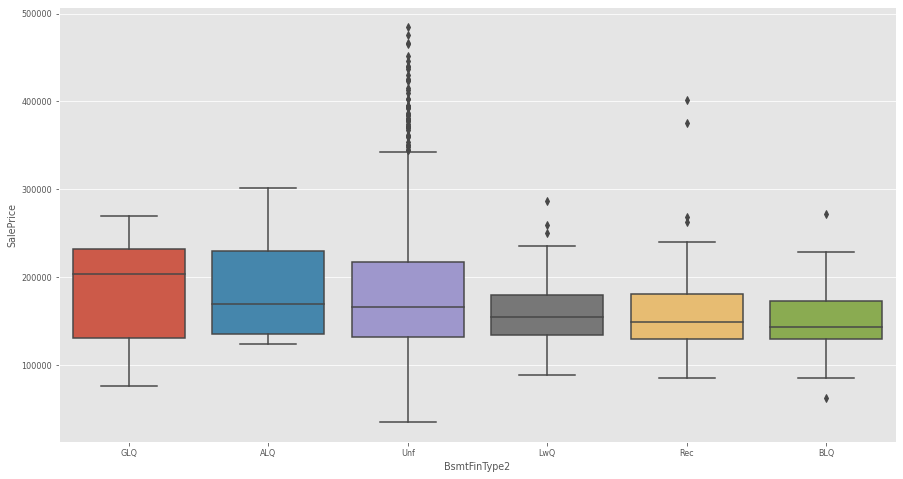

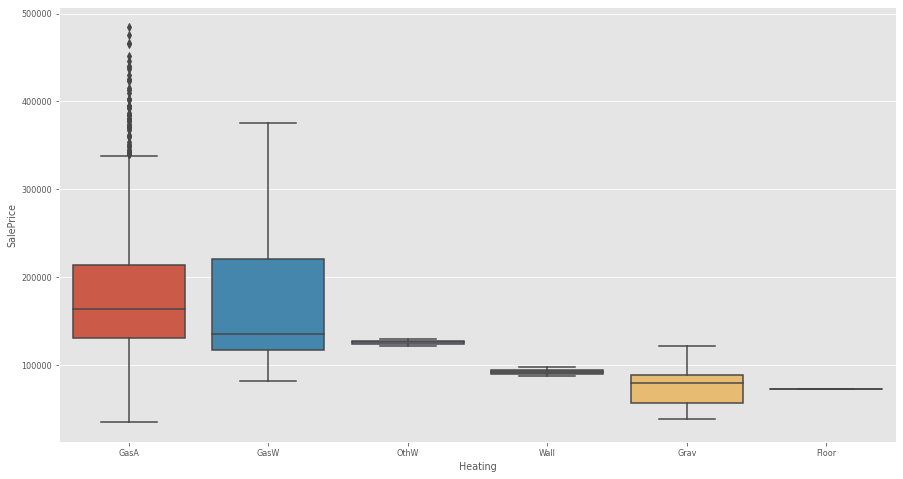

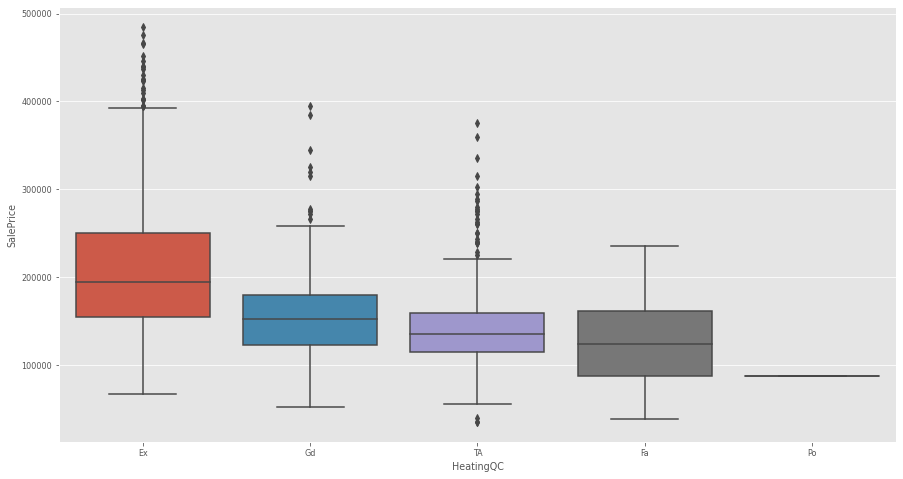

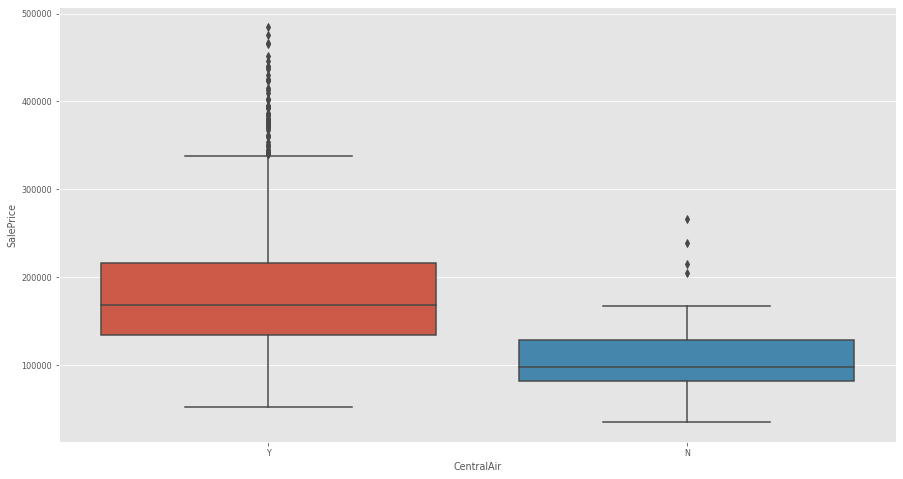

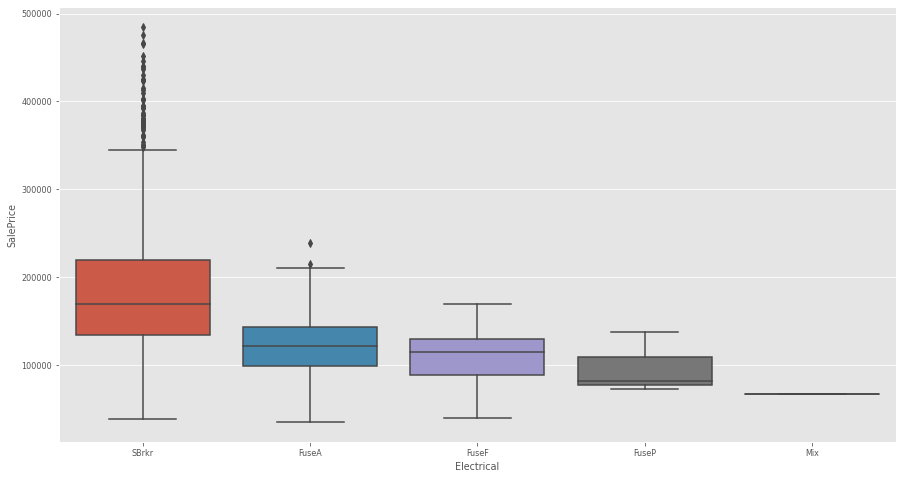

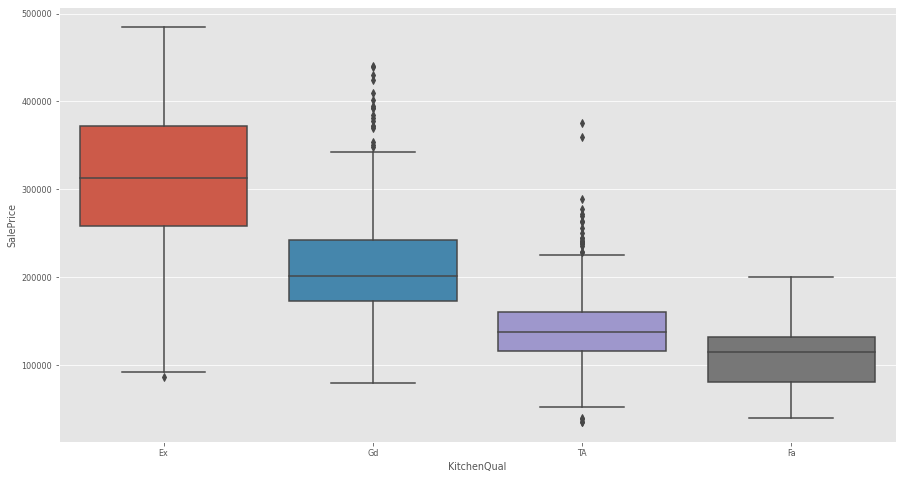

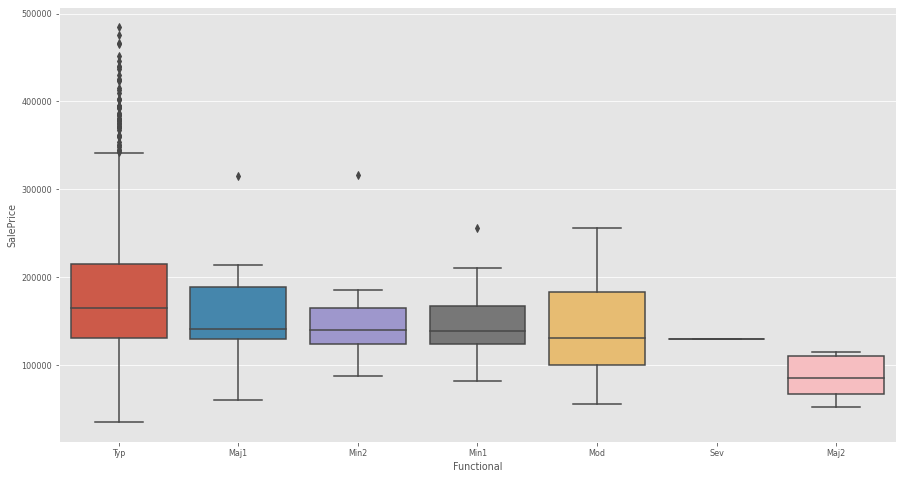

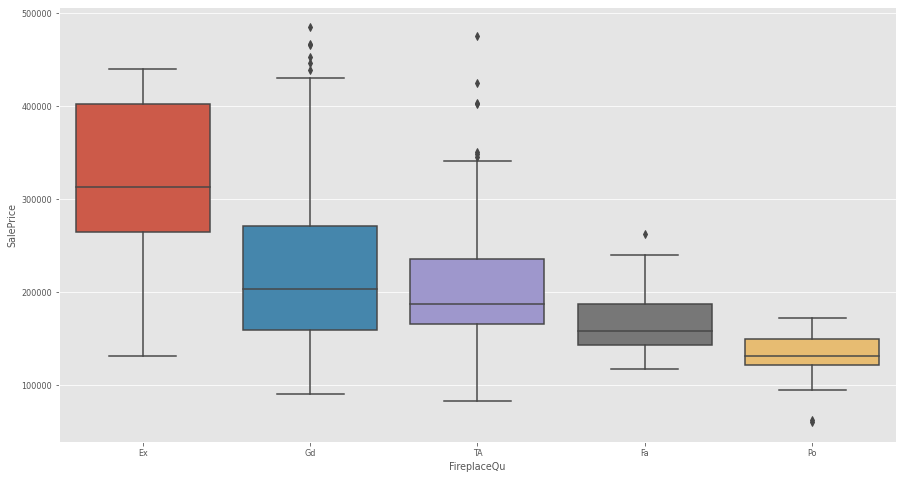

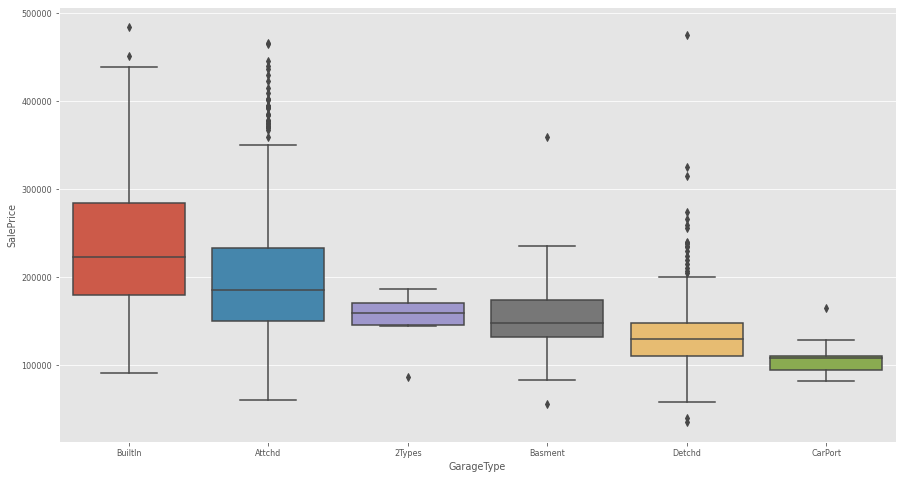

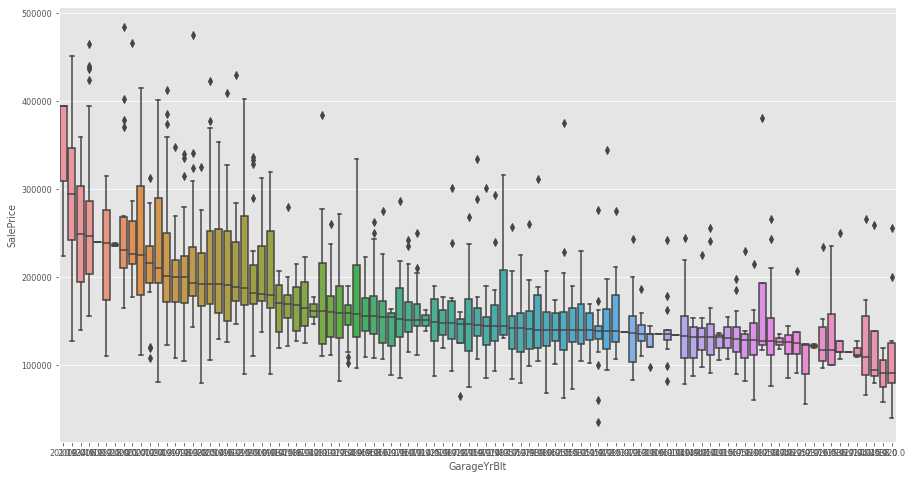

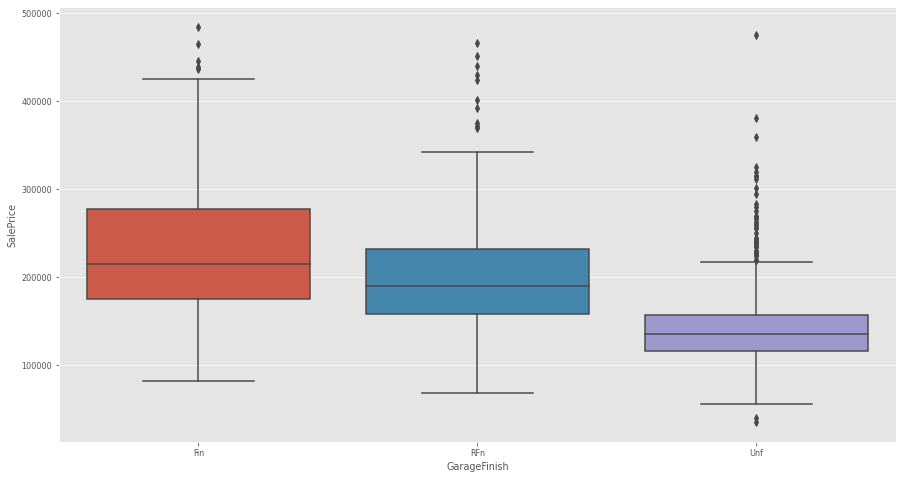

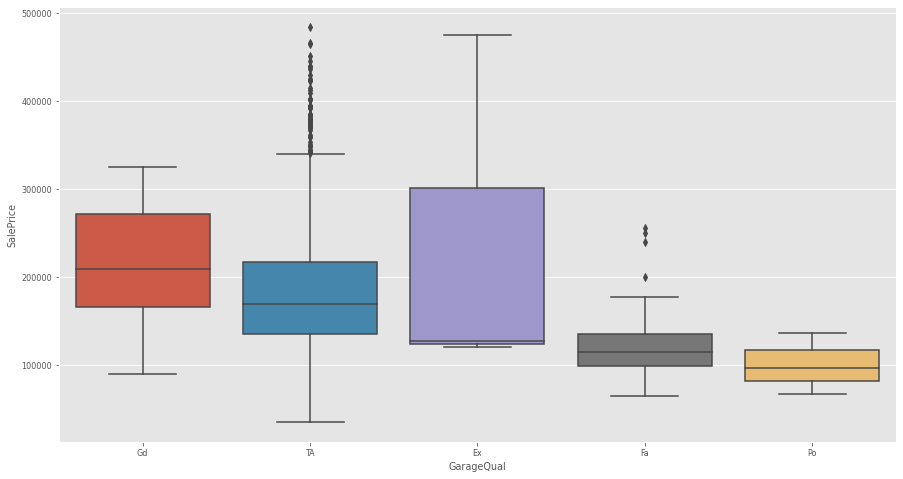

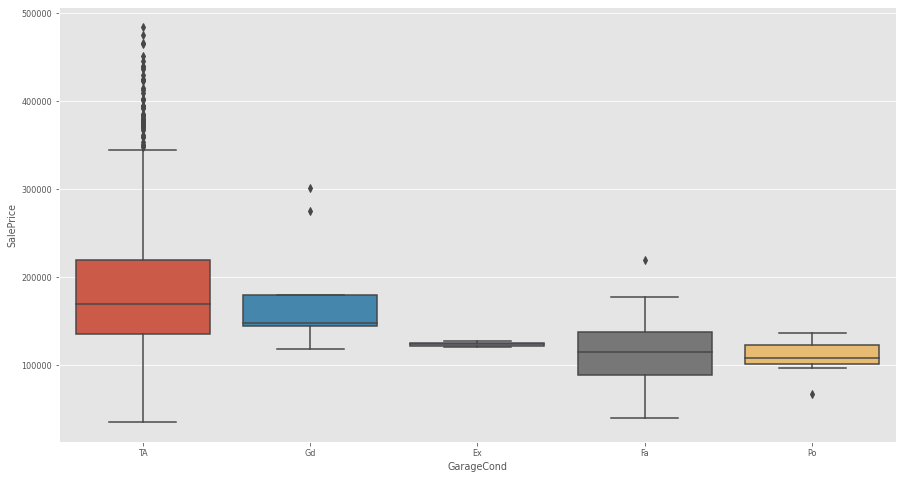

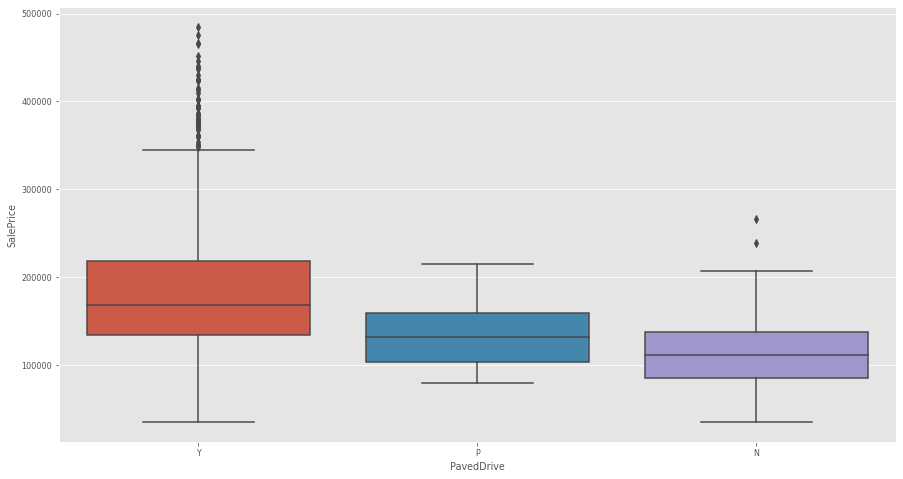

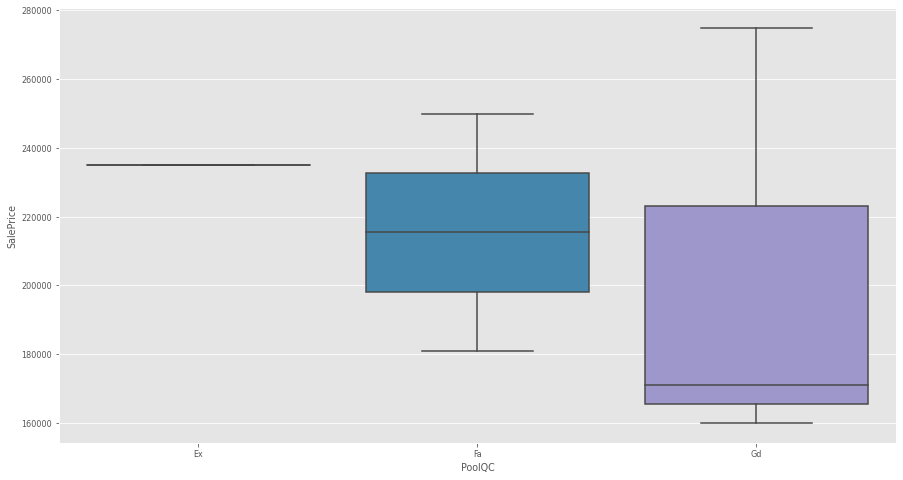

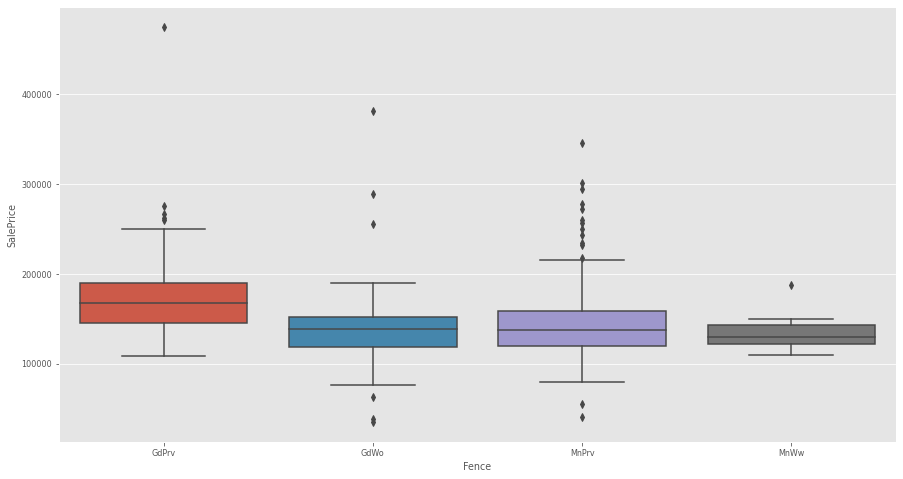

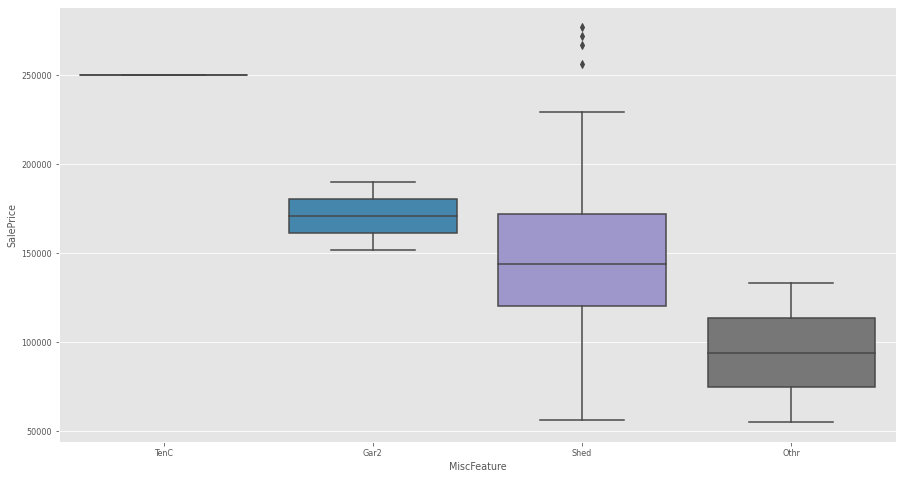

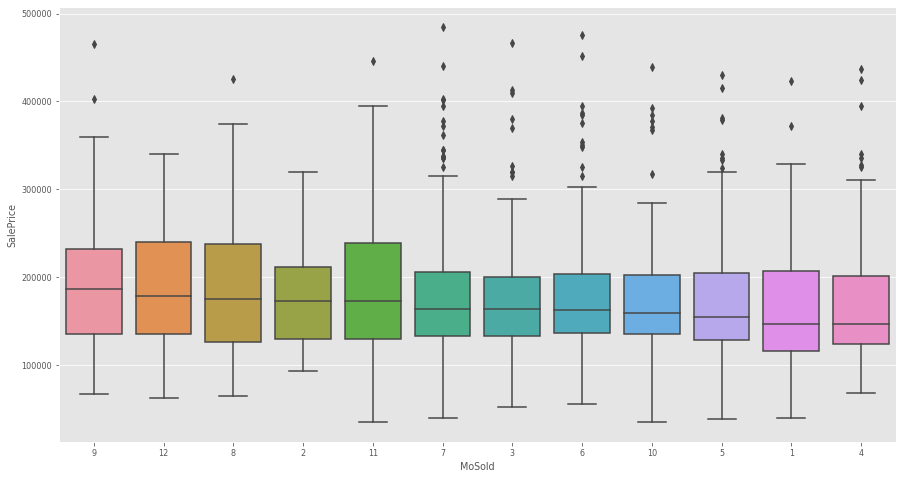

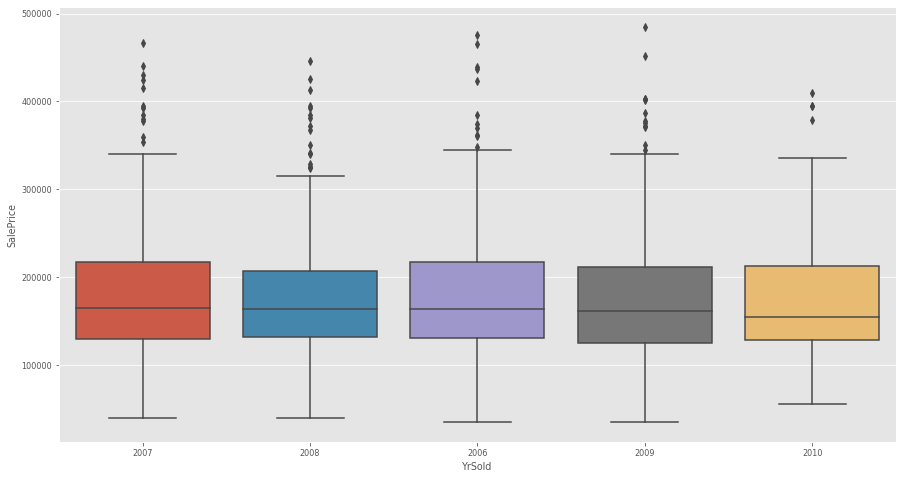

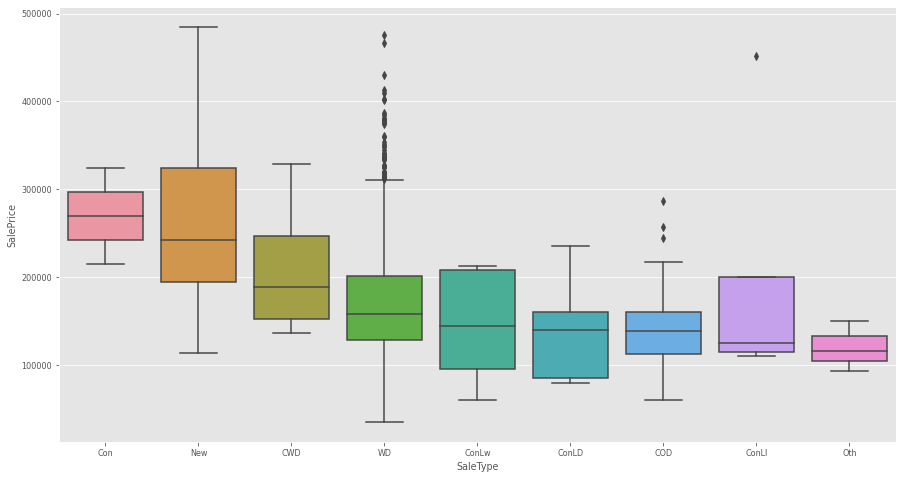

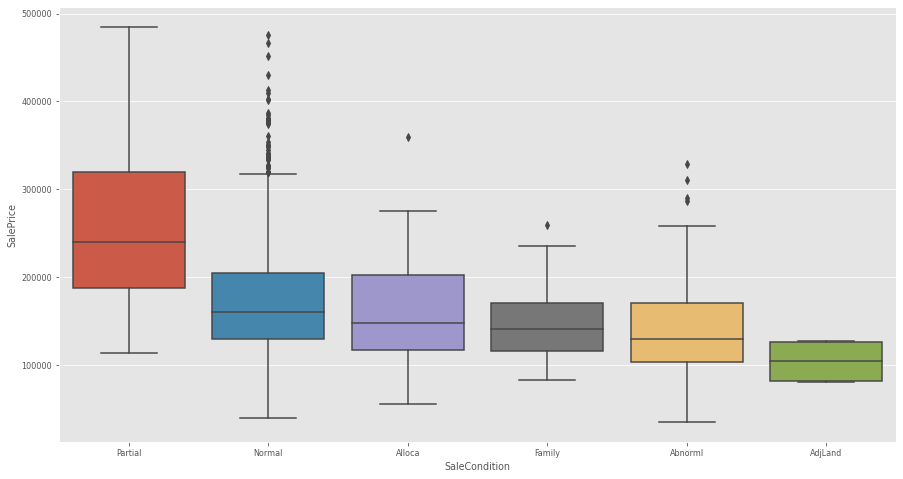

In [25]:
for cvar in catlist:   
    plt.figure(figsize = (15,8))
    
    # ordering by median
    temp = train0.groupby([cvar])['SalePrice'].median().sort_values(ascending=False).reset_index()
    
    # Boxplot
    sns.boxplot(x=train0[cvar], 
                   y=train0['SalePrice'],
               order = list(temp[cvar]))
    #ax.tick_params(axis='x', rotation=45)
    #ax.set_ylabel('Sale Price')
    #ax.set_xlabel(cvar)
    

# III. PREPROCESSING - Preparation for Model Training

## 3A. Imputation - Numerical Variables

In [28]:
# How many Missing Values?
num_train.isna().sum()

index                0
Id                   0
LotFrontage        259
LotArea              0
MasVnrArea           8
BsmtFinSF1           0
BsmtFinSF2           0
BsmtUnfSF            0
TotalBsmtSF          0
1stFlrSF             0
2ndFlrSF             0
LowQualFinSF         0
GrLivArea            0
BsmtFullBath         0
BsmtHalfBath         0
FullBath             0
HalfBath             0
BedroomAbvGr         0
KitchenAbvGr         0
TotRmsAbvGrd         0
Fireplaces           0
GarageCars           0
GarageArea           0
WoodDeckSF           0
OpenPorchSF          0
EnclosedPorch        0
3SsnPorch            0
ScreenPorch          0
PoolArea             0
MiscVal              0
SalePrice            0
AgeWhenSold          0
YrsSinceRemodel      0
dtype: int64

In [29]:
num_miss = list(num_train.columns[np.where(num_train.isna().sum() > 0)])
list(num_miss)

['LotFrontage', 'MasVnrArea']

## * LotFrontage

Lot Frontage (Continuous): Linear feet of street connected to property

In [30]:
train0['LotFrontage'].isnull().sum()

259

In [31]:
# Checking the LotConfig values
train0[train0['LotFrontage'].isnull()]['LotConfig'].unique()

array(['Corner', 'Inside', 'CulDSac', 'FR2'], dtype=object)

There are no obvious discrepancies observed with these missing data. Because I believe these homes do not have street connected to the property. Therefore I will replace the missing data with zero. 

In [32]:
# ACTION: Let's change the LotFrontage to 0.0, for the LotFrontage = NaN rows 
train0.loc[(train0['LotFrontage'].isnull()),'LotFrontage']= 0.0

In [33]:
# Checking if the change was made
train0['LotFrontage'].isnull().sum()

0

## * MasVnrArea

(Google) A masonry veneer is an outer layer of brick or stone on a building. Masonry veneer is a construction material used on the exterior walls of homes and commercial buildings. It is comprised of thin pieces of brick or stone, and gives the appearance of solid masonry without the associated weight and cost.

MasVnrArea (Continuous): Masonry veneer area in square feet

MasVnrType (Nominal): Masonry veneer type

In [34]:
train0['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [35]:
# How many missing again?
train0['MasVnrArea'].isnull().sum()

8

In [36]:
# For these 'MasVnrArea' = nan, what'MasVnrType's do we have?
train0[train0['MasVnrArea'].isnull()]['MasVnrType'].unique()

array([nan], dtype=object)

In [37]:
# ACTION: Let's change the MasVnrType to 'None', for the MasVnrArea = NaN rows 
train0.loc[(train0['MasVnrArea'].isnull()),'MasVnrType']='None'

# ACTION: Let's change the MasVnrArea to 0.0, for the MasVnrArea = NaN rows 
train0.loc[(train0['MasVnrArea'].isnull()),'MasVnrArea']= 0.0

In [38]:
train0['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [39]:
print('MasVnrArea = nan are gone')
train0['MasVnrArea'].isnull().sum()

MasVnrArea = nan are gone


0

#### Another Discrepancy
- Here you see that some of the 'MasVnrType' == 'None' rows, have 'MasVnrArea' that are not equal to 0.0

In [40]:
print('Another issue... This does NOT make sense:')
train0[(train0['MasVnrType']=='None') & (train0['MasVnrArea']!=0)]['MasVnrArea']

Another issue... This does NOT make sense:


622     288.0
769       1.0
1221      1.0
1291    344.0
1325    312.0
Name: MasVnrArea, dtype: float64

In [ ]:
# ACTION: Let's change these rows' MasVnrArea to 0.0
# train0.loc[((train0['MasVnrType']=='None') & (train0['MasVnrArea']!=0)),'MasVnrArea']= 0.0

# OR 
# remove these rows????? 
#train0 = train0.drop(labels=[624,773,1230,1300,1334], axis=0)

In [ ]:
train0[(train0['MasVnrType']=='None') & (train0['MasVnrArea']!=0)]['MasVnrArea']

### Zeros

In [41]:
# Count number of zeros in all columns of Dataframe
for column_name in num_train.columns:
    column = num_train[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    if count != 0: 
        print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  index  is :  1
Count of zeros in column  MasVnrArea  is :  860
Count of zeros in column  BsmtFinSF1  is :  466
Count of zeros in column  BsmtFinSF2  is :  1285
Count of zeros in column  BsmtUnfSF  is :  118
Count of zeros in column  TotalBsmtSF  is :  37
Count of zeros in column  2ndFlrSF  is :  826
Count of zeros in column  LowQualFinSF  is :  1425
Count of zeros in column  BsmtFullBath  is :  853
Count of zeros in column  BsmtHalfBath  is :  1370
Count of zeros in column  FullBath  is :  9
Count of zeros in column  HalfBath  is :  911
Count of zeros in column  BedroomAbvGr  is :  6
Count of zeros in column  KitchenAbvGr  is :  1
Count of zeros in column  Fireplaces  is :  690
Count of zeros in column  GarageCars  is :  81
Count of zeros in column  GarageArea  is :  81
Count of zeros in column  WoodDeckSF  is :  758
Count of zeros in column  OpenPorchSF  is :  656
Count of zeros in column  EnclosedPorch  is :  1243
Count of zeros in column  3SsnPorch  is :  1

In [42]:
print('Zeros could be reasonable, come back here later')

Zeros could be reasonable, come back here later


## 3B. Imputation - Categorica Variables

In [43]:
# How many Missing Values?
cat_train.isna().sum()

MSSubClass          0
MSZoning            0
Street              0
Alley            1360
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1445
Fence     

In [44]:
cat_miss = list(cat_train.columns[np.where(cat_train.isna().sum() > 0)])
list(cat_miss)

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [45]:
# Checking the values available for each categorical variable
for cvar in cat_miss:
    print(cvar, train0[cvar].unique())

Alley [nan 'Grvl' 'Pave']
MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageYrBlt ['2003.0' '1976.0' '2001.0' '1998.0' '2000.0' '1993.0' '2004.0' '1973.0'
 '1931.0' '1939.0' '1965.0' '2005.0' '1962.0' '2006.0' '1960.0' '1991.0'
 '1970.0' '1967.0' '1958.0' '1930.0' '2002.0' '1968.0' '2007.0' '2008.0'
 '1957.0' '1920.0' '1966.0' '1959.0' '1995.0' '1954.0' '1953.0' nan
 '1983.0' '1977.0' '1997.0' '1985.0' '1963.0' '1981.0' '1964.0' '1999.0'
 '1935.0' '1990.0' '1945.0' '1987.0' '1989.0' '1915.0' '1956.0' '1948.0'
 '1974.0' '2009.0' '1950.0' '1961.0' '1921.0' '1900.0' '1979.0' '1951.0'
 '1969.0' '1936.0'

### Alley

In [46]:
print(train0['Alley'].unique())

[nan 'Grvl' 'Pave']


In [47]:
train0.loc[(train0['Alley'].isna()),'Alley']= 'NoAlley'

In [48]:
print(train0['Alley'].unique())

['NoAlley' 'Grvl' 'Pave']


### MasVnrType

I examined this variable above, when looking at the numerical variable MasVnrArea. See above comments. 

### Basement Variables 

In [49]:
# Grabbing the indices when each bsmt variabes have missing values
bsmt_1 = np.where(train0['BsmtQual'].isna())
bsmt_2 = np.where(train0['BsmtCond'].isna())
bsmt_3 = np.where(train0['BsmtExposure'].isna())
bsmt_4 = np.where(train0['BsmtFinType1'].isna())
bsmt_5 = np.where(train0['BsmtFinType2'].isna())

In [50]:
all_NoBsmt_rows = np.concatenate((bsmt_1, bsmt_2, bsmt_3, bsmt_4, bsmt_5), axis=None)
print(all_NoBsmt_rows)

[  17   39   90  102  156  181  258  341  361  370  391  518  530  531
  551  644  702  733  746  774  863  889  892  978  994 1005 1029 1039
 1041 1042 1083 1171 1207 1209 1223 1312 1403   17   39   90  102  156
  181  258  341  361  370  391  518  530  531  551  644  702  733  746
  774  863  889  892  978  994 1005 1029 1039 1041 1042 1083 1171 1207
 1209 1223 1312 1403   17   39   90  102  156  181  258  341  361  370
  391  518  530  531  551  644  702  733  746  774  863  889  892  942
  978  994 1005 1029 1039 1041 1042 1083 1171 1207 1209 1223 1312 1403
   17   39   90  102  156  181  258  341  361  370  391  518  530  531
  551  644  702  733  746  774  863  889  892  978  994 1005 1029 1039
 1041 1042 1083 1171 1207 1209 1223 1312 1403   17   39   90  102  156
  181  258  331  341  361  370  391  518  530  531  551  644  702  733
  746  774  863  889  892  978  994 1005 1029 1039 1041 1042 1083 1171
 1207 1209 1223 1312 1403]


In [51]:
No_Bsmt_rows = np.unique(all_NoBsmt_rows)
print('These particular rows should have no basements, lets verify.')
print(No_Bsmt_rows)

These particular rows should have no basements, lets verify.
[  17   39   90  102  156  181  258  331  341  361  370  391  518  530
  531  551  644  702  733  746  774  863  889  892  942  978  994 1005
 1029 1039 1041 1042 1083 1171 1207 1209 1223 1312 1403]


In [52]:
# lets look at these basement categorical variables 
bsmt_cvars = ['BsmtQual',
             'BsmtCond', 
             'BsmtExposure', 
             'BsmtFinType1',
             'BsmtFinType2']

print('For each variable, these indices have these values for these particular rows:')
print('Expecting nan values (these are the "no basement" rows):')
print('\n')

for bcvar in bsmt_cvars:
    
    print(bcvar,
          No_Bsmt_rows[np.where(train0.loc[No_Bsmt_rows,bcvar].notna())],
          train0.loc[No_Bsmt_rows,bcvar].unique())
print('\n')

For each variable, these indices have these values for these particular rows:
Expecting nan values (these are the "no basement" rows):


BsmtQual [331 942] [nan 'Gd']
BsmtCond [331 942] [nan 'TA']
BsmtExposure [331] [nan 'No']
BsmtFinType1 [331 942] [nan 'GLQ' 'Unf']
BsmtFinType2 [942] [nan 'Unf']




BsmtFinSF1 indices with samples > 0 [331]
BsmtFinSF2 indices with samples > 0 [331]
BsmtUnfSF indices with samples > 0 [331 942]
TotalBsmtSF indices with samples > 0 [331 942]
BsmtFullBath indices with samples > 0 [331]
BsmtHalfBath indices with samples > 0 []


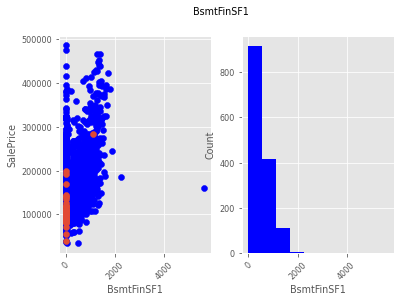

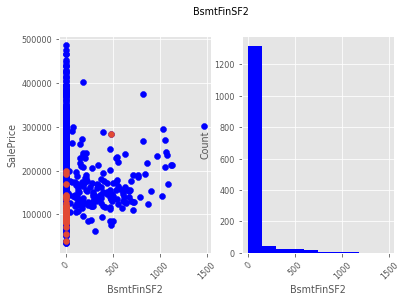

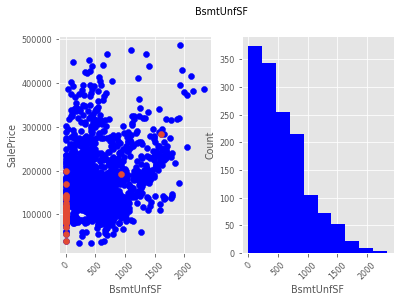

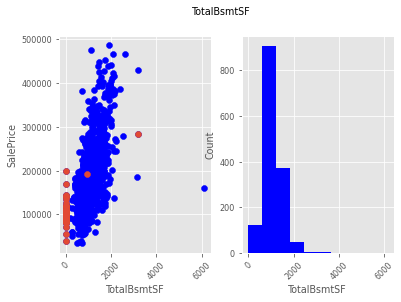

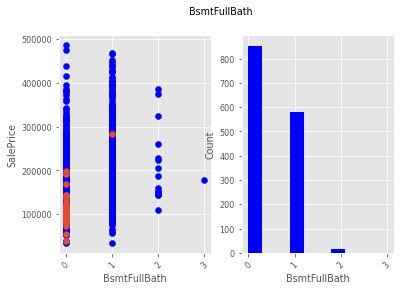

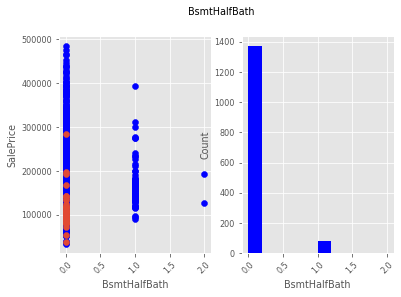

In [53]:
# lets look at these basement numerical variables 
bsmt_nvars = ['BsmtFinSF1', 
             'BsmtFinSF2', 
             'BsmtUnfSF', 
             'TotalBsmtSF', 
             'BsmtFullBath', 
             'BsmtHalfBath']     

for nvar in bsmt_nvars:
    fig, axs = plt.subplots(1,2)
    fig.suptitle(nvar)
    
    # Histogram
    axs[1].hist(train0[nvar],color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel(nvar)
    
    # Scatter
    axs[0].scatter(train0[nvar],train0['SalePrice'],color='b')
    
    # -------------------------------------------------------------------------------
    # Plotting the "no basement" rows to examine if these variables exhibit ZEROs
    # -------------------------------------------------------------------------------
    axs[0].scatter(train0.loc[No_Bsmt_rows,nvar],train0.loc[No_Bsmt_rows,'SalePrice'])

    print(nvar, 'indices with samples > 0', No_Bsmt_rows[np.where(train0.loc[No_Bsmt_rows, nvar]>0)])
    
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylabel('SalePrice')
    axs[0].set_xlabel(nvar)

In [54]:
print('Okay, this row is fine. BsmtExposure = No. Everything else looks correct.')
print('This row has a basement. It simply does not have an exposure.\n')
print(train0.loc[331,['BsmtQual',
             'BsmtCond', 
             'BsmtExposure', 
             'BsmtFinType1',
             'BsmtFinSF1', 
             'BsmtFinSF2', 
             'BsmtUnfSF', 
             'TotalBsmtSF', 
             'BsmtFullBath', 
             'BsmtHalfBath']])

Okay, this row is fine. BsmtExposure = No. Everything else looks correct.
This row has a basement. It simply does not have an exposure.

BsmtQual          Gd
BsmtCond          TA
BsmtExposure      No
BsmtFinType1     GLQ
BsmtFinSF1      1124
BsmtFinSF2       479
BsmtUnfSF       1603
TotalBsmtSF     3206
BsmtFullBath       1
BsmtHalfBath       0
Name: 331, dtype: object


In [55]:
print('Okay, this row might be OK. BsmtExposure = NaN. But should be No? Because..')
print('cleary there is a basement (unfinished). Everything else looks reasonable.\n')
print(train0.loc[942,['BsmtQual',
             'BsmtCond', 
             'BsmtExposure', 
             'BsmtFinType1',
             'BsmtFinSF1', 
             'BsmtFinSF2', 
             'BsmtUnfSF', 
             'TotalBsmtSF', 
             'BsmtFullBath', 
             'BsmtHalfBath']])

Okay, this row might be OK. BsmtExposure = NaN. But should be No? Because..
cleary there is a basement (unfinished). Everything else looks reasonable.

BsmtQual         Gd
BsmtCond         TA
BsmtExposure    NaN
BsmtFinType1    Unf
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF       936
TotalBsmtSF     936
BsmtFullBath      0
BsmtHalfBath      0
Name: 942, dtype: object


In [ ]:
# Action for row 942... come back here

### Garage Variables

In [56]:
# Grabbing the indices when each garage variabes have missing values
garg_1 = np.where(train0['GarageType'].isna())
garg_2 = np.where(train0['GarageFinish'].isna())
garg_3 = np.where(train0['GarageQual'].isna())
garg_4 = np.where(train0['GarageCond'].isna())
garg_5 = np.where(train0['GarageYrBlt'].isna())

In [57]:
all_NoGarg_rows = np.concatenate((garg_1, garg_2, garg_3, garg_4, garg_5), axis=None)
# print(all_NoGarg_rows)

In [58]:
No_Garg_rows = np.unique(all_NoGarg_rows)
print('These particular rows should have no garages, lets verify.')
print(No_Garg_rows)

These particular rows should have no garages, lets verify.
[  39   48   78   88   89   99  108  125  127  140  148  155  163  165
  197  209  240  249  286  290  306  374  385  392  430  433  439  462
  493  518  526  531  533  560  580  611  612  618  633  634  636  647
  702  707  735  747  780  821  838  915  936  948  954  962  964  970
 1003 1005 1024 1032 1089 1116 1124 1130 1136 1165 1171 1209 1210 1225
 1248 1274 1314 1316 1317 1328 1340 1398 1440 1441 1444]


In [59]:
# lets look at these garage categorical variables 
garg_cvars = ['GarageType',
             'GarageFinish', 
             'GarageQual', 
             'GarageCond',
             'GarageYrBlt']

print('For each variable, these indices have these values for these particular rows:')
print('Expecting nan values (these are the "no garage" rows):')
print('\n')

for gcvar in garg_cvars:
    
    print(gcvar,
          No_Garg_rows[np.where(train0.loc[No_Garg_rows,gcvar].notna())],
          train0.loc[No_Garg_rows,gcvar].unique())
    
print('\n')

For each variable, these indices have these values for these particular rows:
Expecting nan values (these are the "no garage" rows):


GarageType [] [nan]
GarageFinish [] [nan]
GarageQual [] [nan]
GarageCond [] [nan]
GarageYrBlt [] [nan]




GarageCars indices with samples > 0 []
GarageArea indices with samples > 0 []


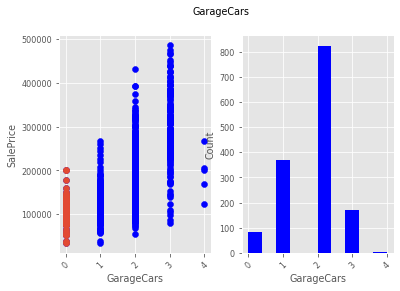

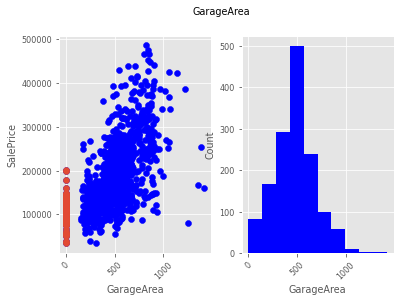

In [60]:
# lets look at these garage numerical variables 
garg_nvars = ['GarageCars', 
             'GarageArea']     

for nvar in garg_nvars:
    fig, axs = plt.subplots(1,2)
    fig.suptitle(nvar)
    
    # Histogram
    axs[1].hist(train0[nvar],color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel(nvar)
    
    # Scatter
    axs[0].scatter(train0[nvar],train0['SalePrice'],color='b')
    
    # -------------------------------------------------------------------------------
    # Plotting the "no garage" rows to examine if these variables exhibit ZEROs
    # -------------------------------------------------------------------------------
    axs[0].scatter(train0.loc[No_Garg_rows,nvar],train0.loc[No_Garg_rows,'SalePrice'])

    print(nvar, 'indices with samples > 0', No_Garg_rows[np.where(train0.loc[No_Garg_rows, nvar]>0)])
    
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylabel('SalePrice')
    axs[0].set_xlabel(nvar)

### Electrical

In [61]:
print(train0['Electrical'].unique())

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


In [62]:
np.where(train0['Electrical'].isna())

(array([1370]),)

In [63]:
# remove row 1370??? electrical information missing

### FireplaceQu

In [64]:
print('FireplaceQu: ', train0['FireplaceQu'].unique())

FireplaceQu:  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


In [65]:
print('Firepaces unique values for the NANs: ', train0.loc[train0['FireplaceQu'].isna(),'Fireplaces'].unique())

Firepaces unique values for the NANs:  [0]


In [66]:
train0.loc[(train0['FireplaceQu'].isna()),'FireplaceQu']= 'NoFirePlace'

In [67]:
print('FireplaceQu: ', train0['FireplaceQu'].unique())

FireplaceQu:  ['NoFirePlace' 'TA' 'Gd' 'Fa' 'Ex' 'Po']


### Fence

In [68]:
print('Fence: ', train0['Fence'].unique())

Fence:  [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [69]:
train0.loc[(train0['Fence'].isna()),'Fence']= 'NoFence'

In [70]:
print('Fence: ', train0['Fence'].unique())

Fence:  ['NoFence' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


### MiscFeature

In [71]:
print('MiscFeature: ', train0['MiscFeature'].unique())

MiscFeature:  [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [72]:
train0.loc[(train0['MiscFeature'].isna()),'MiscFeature']= 'None'

In [73]:
print('MiscFeature: ', train0['MiscFeature'].unique())

MiscFeature:  ['None' 'Shed' 'Gar2' 'Othr' 'TenC']


### Pool Variables

In [74]:
print('PoolQC: ', train0['PoolQC'].unique())
train0.loc[(train0['PoolQC'].isna()),'PoolQC']= 'NoPool'
print('PoolQC: ', train0['PoolQC'].unique())

PoolQC:  [nan 'Ex' 'Fa' 'Gd']
PoolQC:  ['NoPool' 'Ex' 'Fa' 'Gd']


In [75]:
print('Okay all the PoolArea = 0 rows, are PoolQC = NoPool')
train0.loc[train0['PoolArea']==0,'PoolQC'].unique()

Okay all the PoolArea = 0 rows, are PoolQC = NoPool


array(['NoPool'], dtype=object)

In [76]:
print('Okay all the PoolQC = NoPool rows, are Area = 0')
train0.loc[train0['PoolQC']=='NoPool','PoolArea'].unique()

Okay all the PoolQC = NoPool rows, are Area = 0


array([0])

# Save Train Dataset

In [77]:
train = train0.drop(labels=[622,769,1221,1291,1325,942,1370], 
                    axis=0).reset_index()

In [78]:
train.head()

,level_0,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeWhenSold,YrsSinceRemodel
0,0,0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,...,NoFence,None,0,2,2008,WD,Normal,208500,5,5
1,1,1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,...,NoFence,None,0,5,2007,WD,Normal,181500,31,31
2,2,2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,...,NoFence,None,0,9,2008,WD,Normal,223500,7,6
3,3,3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,...,NoFence,None,0,2,2006,WD,Abnorml,140000,91,36
4,4,4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,...,NoFence,None,0,12,2008,WD,Normal,250000,8,8


In [79]:
train.to_csv('./Data/train_clean.csv')